## **1. Introduction**

---
# **Heart Attack Risk Prediction**

**Name**    : Iznia Azyati

---

**URL**
- **Dataset** : [Heart Attack Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data)

- **Hugging Face**: [Link](https://huggingface.co/spaces/Iznia/Heart_Attack_Prediction)

---

**Problem Statement**

Sebuah pusat kesehatan menghadapi tantangan dalam memprediksi serangan jantung pada pasien. Hal ini mengakibatkan keterlambatan intervensi dan menempatkan hidup pasien dalam risiko. Masalah ini berasal dari sifat kompleks gejala serangan jantung dan berbagai faktor risiko, termasuk usia, kondisi kesehatan, dan pilihan gaya hidup. Ketidakmampuan untuk dengan cepat mengidentifikasi siapa yang berisiko tinggi mengalami serangan jantung membuat sulit untuk bertindak cepat dengan bantuan medis. Akibatnya, pasien mungkin tidak mendapatkan perawatan yang mendesak yang mereka butuhkan, yang dapat mencegah konsekuensi serius seperti kecacatan jangka panjang atau bahkan kematian. Situasi ini menunjukkan kebutuhan mendesak akan alat yang lebih baik yang dapat memprediksi serangan jantung lebih awal dan menyesuaikan perawatan sesuai dengan kebutuhan masing-masing individu.

Untuk mengatasi tantangan ini, perusahaan ingin mengembangkan model yang mampu menganalisis data pasien untuk memprediksi kemungkinan terjadinya serangan jantung. Dengan menciptakan algoritme ini, pusat kesehatan akan dapat menganalisis secara menyeluruh berbagai aspek data pasien, seperti riwayat medis, kebiasaan gaya hidup, dan indikator fisiologis, untuk mengidentifikasi pola-pola dan faktor risiko utama yang terkait dengan serangan jantung.

Dataset untuk analisis ini berfokus pada serangan jantung, yang berisi informasi tentang detail pribadi pasien, status kesehatan, gaya hidup, dan apakah mereka telah mengalami serangan jantung.

**Objective**

Proyek ini berfokus pada pembuatan **model klasifikasi** untuk memprediksi serangan jantung, memilih yang berkinerja terbaik di antara `KNN, SVM, Logistic Regression, Decision Tree, Random Forest, dan XGBoost`. Metrik evaluasi utama untuk menilai kinerja model adalah `Recall`, yang akan digunakan untuk menentukan efektivitas setiap model dalam mengidentifikasi kasus serangan jantung.

---

## **2. Libraries**

Install Library yang belum ada

In [741]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import Library yang dibutuhkan

In [742]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import phik
import pickle

# Import libraries for data preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
from collections import Counter

# Import libraries for model creation and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline          
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# saving models
import pickle
import json


## **3. Data Loading & Cleaning**

#### **i. Data Loading**

In [743]:
# Load dataset
df_ori = pd.read_csv('P1M2_Iznia_Azyati_dataset.csv')

# Duplicate dataset
df = df_ori.copy()


In [744]:
# Show the first 10 data
df.head(10)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Diet,Stress Level,BMI,Triglycerides,Continent,Heart Attack Risk
0,BMW7812,67,Male,208,72,0,1,0,0,Average,9,31.251233,286,South America,0
1,CZE1114,21,Male,389,98,1,1,1,1,Unhealthy,1,27.194973,235,North America,0
2,BNI9906,21,Female,324,72,1,0,0,0,Healthy,9,28.176571,587,Europe,0
3,JLN3497,84,Male,383,73,1,1,0,1,Average,9,36.464704,378,North America,0
4,GFO8847,66,Male,318,93,1,1,1,0,Unhealthy,6,21.809144,231,Asia,0
5,ZOO7941,54,Female,297,48,1,1,0,1,Unhealthy,2,20.146840,795,Europe,1
6,WYV0966,90,Male,358,84,0,1,0,1,Healthy,7,28.885811,284,North America,1
7,XXM0972,84,Male,220,107,0,1,1,1,Average,4,22.221862,370,Asia,1
8,XCQ5937,20,Male,145,68,1,1,1,0,Average,5,35.809901,790,South America,0
9,FTJ5456,43,Female,248,55,0,1,1,1,Unhealthy,4,22.558917,232,Asia,0


In [745]:
# Show the last 10 data
df.tail(10)

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Diet,Stress Level,BMI,Triglycerides,Continent,Heart Attack Risk
8753,NVC8704,82,Male,311,87,0,1,1,1,Unhealthy,7,27.694240,515,Australia,1
8754,LZM3606,80,Female,383,91,1,1,0,1,Healthy,3,20.490450,174,South America,1
8755,KQR8949,25,Male,307,78,0,1,0,1,Average,3,33.469360,296,Europe,0
8756,BUE0416,22,Male,347,108,0,1,0,1,Healthy,1,20.295054,641,North America,1
8757,YDX2478,59,Female,378,99,0,1,1,0,Healthy,4,39.976061,158,Asia,0
8758,MSV9918,60,Male,121,61,1,1,0,1,Healthy,8,19.655895,67,Asia,0
8759,QSV6764,28,Female,120,73,1,0,1,0,Healthy,8,23.993866,617,North America,0
8760,XKA5925,47,Male,250,105,0,1,1,1,Average,5,35.406146,527,South America,1
8761,EPE6801,36,Male,178,60,1,1,0,0,Unhealthy,5,27.294020,114,South America,0
8762,ZWN9666,25,Female,356,75,1,0,0,1,Healthy,8,32.914151,180,Europe,1


Berdasarkan dataset yang ada, merupakan kerangka data yang berisi informasi terkait individu dan faktor risiko potensial serangan jantung. Ini mencakup informasi tentang demografi individu (jenis kelamin, usia), faktor gaya hidup (merokok, alkohol, BMI), dan kondisi kesehatan (diabetes, heart rate).

Berikut adalah tabel yang berisi detail tambahan tentang kumpulan data:

<center>

| **Column Name**    | **Description**                                          | **Data Type**          |
|:-------------------|:----------------------------------------------------------|:-----------------------|
|Patient ID          | Unique identifier for each patient                       | Numerical Continuous      |
|Age | Age of the patient | Numerical Discrete |
|Sex | Gender of the patient (Male/Female) | Categorical Nominal |
|Cholesterol | Cholesterol levels of the patient | Numerical Continuous |
|Heart Rate | Heart rate of the patient | Numerical Continuous |
|Diabetes | Whether the patient has diabetes (Yes/No) | Categorical Encoded |
|Smoking | Smoking status of the patient (1: Smoker, 0: Non-smoker) | Categorical Encoded |
|Obesity | Obesity status of the patient (1: Obese, 0: Not obese) | Categorical Encoded |
|Alcohol Consumption | Level of alcohol consumption by the patient (None/Light/Moderate/Heavy) | Categorical Nominal |
|Diet | Dietary habits of the patient (Healthy/Average/Unhealthy) | Categorical Nominal |
|Stress Level | Stress level reported by the patient (1-10) | Numerical Discrete |
|BMI | Body Mass Index (BMI) of the patient | Numerical Continuous |
|Triglycerides | Triglyceride levels of the patient | Numerical Continuous |
|Continent | Continent where the patient resides | Categorical Nominal |
|Heart Attack Risk | Presence of heart attack risk (1: Yes, 0: No) | Categorical Encoded |

Metode `info` akan menampilkan detail utama tentang informasi dataset.

In [746]:
# Check shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (8763, 15)


Pada dataset ini terdapat 8763 baris dengan 15 kolom.

Untuk insight data yang lebih mendalam, method `info` digunakan untuk memeriksa informasi ringkasan dataset.

In [747]:
# Check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient ID           8763 non-null   object 
 1   Age                  8763 non-null   int64  
 2   Sex                  8763 non-null   object 
 3   Cholesterol          8763 non-null   int64  
 4   Heart Rate           8763 non-null   int64  
 5   Diabetes             8763 non-null   int64  
 6   Smoking              8763 non-null   int64  
 7   Obesity              8763 non-null   int64  
 8   Alcohol Consumption  8763 non-null   int64  
 9   Diet                 8763 non-null   object 
 10  Stress Level         8763 non-null   int64  
 11  BMI                  8763 non-null   float64
 12  Triglycerides        8763 non-null   int64  
 13  Continent            8763 non-null   object 
 14  Heart Attack Risk    8763 non-null   int64  
dtypes: float64(1), int64(10), object(4)
me

Dataset berisi **8763 baris** dan **15 kolom**. Tidak ada missing value dalam dataset ini. Tipe data yang termasuk dalam dataset ini terdiri dari, 1 tipe float, 10 tipe integer, dan 4 tipe objek.

Selanjutnya, akan mengexplore distribusi dataset menggunakan metode `describe` akan memberikan wawasan tentang karakteristik numerik dan statistik keseluruhannya.

In [748]:
# Check descriptive statistictis
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Smoking,Obesity,Alcohol Consumption,Stress Level,BMI,Triglycerides,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.896839,0.501426,0.598083,5.469702,28.891446,417.677051,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.304186,0.500026,0.490313,2.859622,6.319181,223.748137,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.002337,30.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,1.000000,0.000000,0.000000,3.000000,23.422985,225.500000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.000000,28.768999,417.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,8.000000,34.324594,612.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,10.000000,39.997211,800.000000,1.000000


**Insight:**
- Dataset ini berisi 8763 entri, dengan usia berkisar dari 18 tahun hingga 90 tahun.
- Sekitar 65.23% individu dalam dataset ini memiliki diabetes, dan sekitar 50.14% mengalami obesitas.
- Rata-rata kadar kolesterol dalam dataset ini adalah sekitar 259.88 mg/dL, dengan rentang dari 120 mg/dL hingga 400 mg/dL.
- Rata-rata detak jantung adalah sekitar 75.02 bpm, dengan rentang dari 40 bpm hingga 110 bpm.
- Rata-rata BMI (Indeks Massa Tubuh) adalah sekitar 28.89 kg/m², dengan nilai berkisar dari 18.00 kg/m² hingga 40.00 kg/m².
- Dataset ini mencatat individu yang berisiko mengalami serangan jantung, yang mencakup sekitar 35.82% dari total entri.

Dari statistik deskriptif diatas, dapat dilihat distribusi data untuk setiap kolom, yang memberikan gambaran tentang karakteristik populasi dalam dataset ini. Misalnya, sebagian besar pasien berada dalam rentang usia 35 hingga 72 tahun, memiliki kadar kolesterol sekitar 259 mg/dL, dan sebagian besar memiliki BMI sekitar 28.77 kg/m². Adanya kolom dengan nilai rata-rata seperti "Diabetes", "Smoking", "Obesity", dan "Heart Attack Risk" menunjukkan persentase pasien yang memiliki kondisi tersebut.

Setelah itu, metode `nunique` dapat digunakan untuk menghitung nilai unik di setiap kolom.

In [749]:
# Check total unique values
df.nunique()

Patient ID             8763
Age                      73
Sex                       2
Cholesterol             281
Heart Rate               71
Diabetes                  2
Smoking                   2
Obesity                   2
Alcohol Consumption       2
Diet                      3
Stress Level             10
BMI                    8763
Triglycerides           771
Continent                 6
Heart Attack Risk         2
dtype: int64

Dataset menyajikan serangkaian nilai di seluruh fiturnya. Kolom `Patient ID`, yang berfungsi sebagai pengidentifikasi, berisi 8763 nilai unik. Beberapa kolom hanya memiliki 2 nilai unik, sedangkan kolom `BMI` nilainya sama dengan kolom `Patient ID` yaitu sebanyak 8763 nilai unik.

Metode `duplikat` kemudian digunakan untuk memeriksa apakah ada entri duplikat dalam kumpulan data.

In [750]:
# Check total of duplicated rows
print(df.duplicated().any())
print(df.duplicated().sum())


False
0


Hasilnya menunjukkan bahwa dataset tidak berisi entri duplikat, yang menunjukkan bahwa tidak ada persyaratan untuk menghapus baris duplikat.

Selanjutnya, missing values juga diperiksa menggunakan metode `isnull`.

In [751]:
# Check missing values
df.isnull().sum()

Patient ID             0
Age                    0
Sex                    0
Cholesterol            0
Heart Rate             0
Diabetes               0
Smoking                0
Obesity                0
Alcohol Consumption    0
Diet                   0
Stress Level           0
BMI                    0
Triglycerides          0
Continent              0
Heart Attack Risk      0
dtype: int64

Seperti disebutkan sebelumnya, bahwa tidak terdapat missing values pada dataset ini. 

#### **ii. Data Cleaning**

Setelah explore dataset dan mengidentifikasi area yang akan dibersihkan, ditentukan bahwa sebagian besar kolom akurat.

Oleh karena itu, langkah cleaning akan fokus hanya pada penghapusan kolom pengidentifikasi karena tidak memiliki korelasi apa pun dengan variabel target.

In [752]:
#Rename Columns

df= df.rename(columns={'Patient ID': 'Patient_ID',
                       'Heart Rate': 'Heart_Rate',
                       'Alcohol Consumption': 'Alcohol_Consumption',
                       'Stress Level': 'Stress_Level',
                       'Heart Attack Risk': 'Heart_Attack_Risk'})

In [753]:
# Drop column
df = df.drop(columns=['Patient_ID'])

In [754]:
# Mengubah kolom 'Sex' dan 'Diet' menjadi nilai numerik
df['Sex'].replace(['Female', 'Male'], [1, 0], inplace=True)
df['Diet'].replace(['Healthy', 'Average', 'Unhealthy'], [2, 1, 0], inplace=True)
df['Continent'].replace(['South America', 'North America', 'Europe', 'Asia', 'Africa'], [0, 1, 2, 3, 4], inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_93468\2277094266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['Female', 'Male'], [1, 0], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_93468\2277094266.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'].replace(['

In [755]:
# Display Data
df

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Smoking,Obesity,Alcohol_Consumption,Diet,Stress_Level,BMI,Triglycerides,Continent,Heart_Attack_Risk
0,67,0,208,72,0,1,0,0,1,9,31.251233,286,0,0
1,21,0,389,98,1,1,1,1,0,1,27.194973,235,1,0
2,21,1,324,72,1,0,0,0,2,9,28.176571,587,2,0
3,84,0,383,73,1,1,0,1,1,9,36.464704,378,1,0
4,66,0,318,93,1,1,1,0,0,6,21.809144,231,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,0,121,61,1,1,0,1,2,8,19.655895,67,3,0
8759,28,1,120,73,1,0,1,0,2,8,23.993866,617,1,0
8760,47,0,250,105,0,1,1,1,1,5,35.406146,527,0,1
8761,36,0,178,60,1,1,0,0,0,5,27.294020,114,0,0


#### **iii. Data Checking**

Untuk memverifikasi bahwa kolom telah dihilangkan dengan benar, metode `info` digunakan lagi untuk double-check.

In [756]:
# Data checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  8763 non-null   int64  
 1   Sex                  8763 non-null   int64  
 2   Cholesterol          8763 non-null   int64  
 3   Heart_Rate           8763 non-null   int64  
 4   Diabetes             8763 non-null   int64  
 5   Smoking              8763 non-null   int64  
 6   Obesity              8763 non-null   int64  
 7   Alcohol_Consumption  8763 non-null   int64  
 8   Diet                 8763 non-null   int64  
 9   Stress_Level         8763 non-null   int64  
 10  BMI                  8763 non-null   float64
 11  Triglycerides        8763 non-null   int64  
 12  Continent            8763 non-null   object 
 13  Heart_Attack_Risk    8763 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 958.6+ KB


Sekarang outputnya mengidentifikasikan bahwa terdapat **14 kolom** bukan 15 kolom, dan kolom `Patient_ID` tidak ada lagi. Ini mengonfirmasi bahwa data cleaning sudah berhasil dilakukan. 

## **4. Exploratory Data Analysis (EDA)**



Setelah loading dan cleaning data, langkah selanjutnya adalah mengeksplorasi distribusi dan karakteristik data. Eksplorasi ini menggunakan visualisasi seperti bar charts, scatter plots, histograms, dan metode lain untuk mendapatkan pemahaman yang lebih mendalam tentang dataset.

#### **i. Distribution of Age**

In [757]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='salmon')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='pink')
    plt.title('Boxplot')

    plt.show()

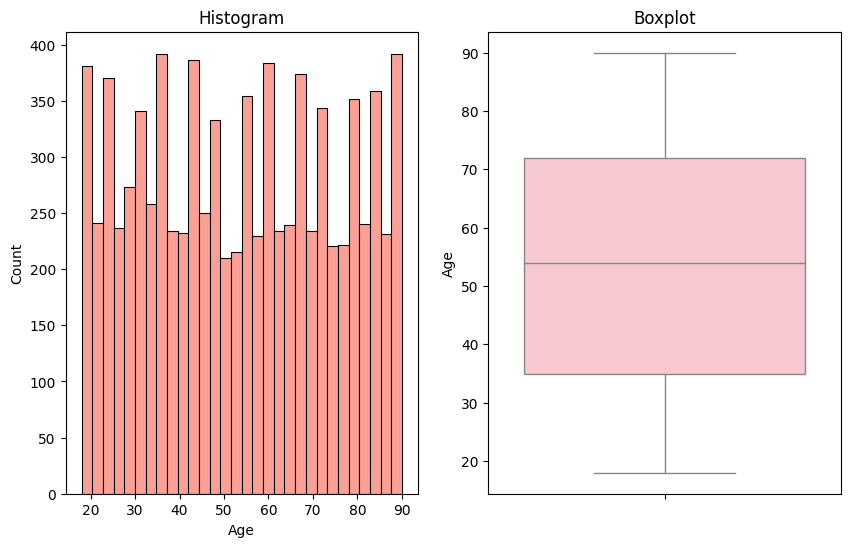

In [758]:
diagnostic_plots(df, 'Age')

**Explanation:**

**Histogram**
- Rentang usia dalam dataset berkisar dari 18 hingga 90 tahun.
- Distribusi usia tampak cukup merata di berbagai rentang usia, dengan sedikit variasi dalam frekuensi di beberapa kelompok usia.
- Tidak ada kelompok usia yang mendominasi secara signifikan, meskipun ada fluktuasi kecil di beberapa kelompok usia tertentu.

**Boxplot**
- Garis di dalam kotak menunjukkan median usia yang berada di sekitar 54 tahun. Ini berarti bahwa setengah dari populasi memiliki usia di bawah 54 tahun dan setengahnya lagi di atas 54 tahun.
- Kotak yang mewakili rentang antara Q1 dan Q3 menunjukkan bahwa usia dari 50% populasi berkisar antara sekitar 35 tahun (Q1) dan 72 tahun (Q3).

#### **ii. Cholesterol levels by Heart Attack Risk**

<Figure size 1000x600 with 0 Axes>

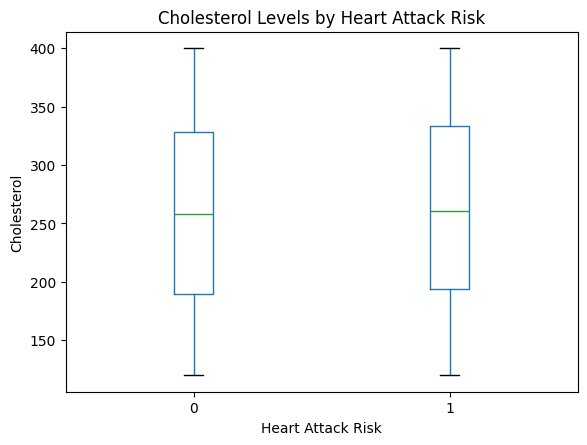

In [759]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Cholesterol', by='Heart_Attack_Risk', grid=False)
plt.title('Cholesterol Levels by Heart Attack Risk')
plt.suptitle('')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Cholesterol')
plt.show()

**Explanation:**
- Boxplot menunjukkan distribusi tingkat kolesterol untuk dua kelompok: individu yang tidak berisiko serangan jantung ("No") dan individu yang berisiko serangan jantung ("Yes").
- Median tingkat kolesterol untuk kedua kelompok berada pada kisaran yang hampir sama, sekitar 250-260 mg/dL.
- Rentang nilai kolesterol untuk individu yang tidak berisiko serangan jantung adalah sekitar 150-400 mg/dL. Rentang nilai kolesterol untuk individu yang berisiko serangan jantung adalah sekitar 150-400 mg/dL. Serta tidak ada perbedaan yang mencolok antara kedua kelompok dalam hal distribusi tingkat kolesterol.

**Insight:**
- Distribusi tingkat kolesterol antara individu yang berisiko dan tidak berisiko serangan jantung sangat mirip. Ini menunjukkan bahwa kolesterol mungkin bukan satu-satunya faktor yang menentukan risiko serangan jantung dalam dataset ini.
- Variasi dalam tingkat kolesterol yang besar menunjukkan bahwa ada faktor lain yang mungkin mempengaruhi kadar kolesterol, seperti diet, gaya hidup, dan faktor genetik.
- Ketiadaan outlier menunjukkan bahwa data kolesterol tidak memiliki nilai ekstrem yang tidak biasa, yang dapat berarti pengumpulan data dilakukan dengan baik.

#### **iii. Heart Rate Distribution**

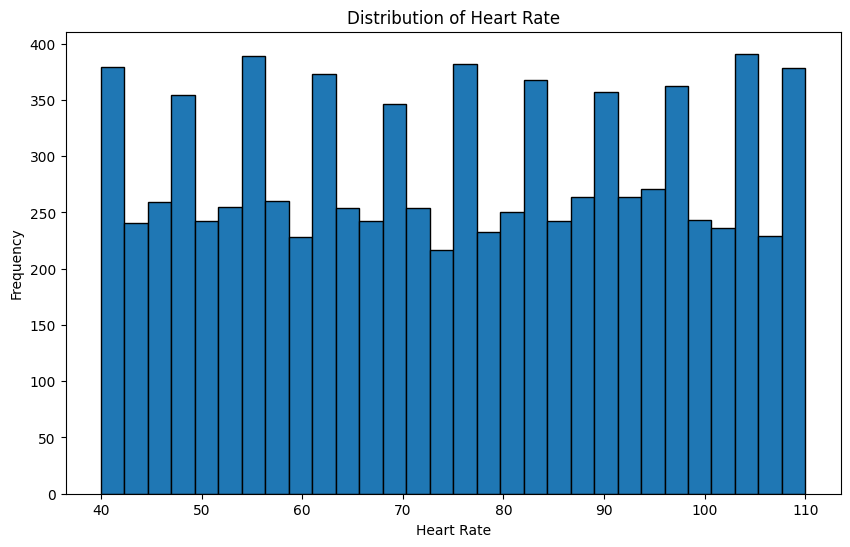

In [760]:
plt.figure(figsize=(10, 6))
df['Heart_Rate'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

**Explanation:**
- Rentang detak jantung dalam dataset berkisar dari 40 bpm hingga 110 bpm.
- Kelompok detak jantung diantara 60-70 bpm dan 80-90 bpm memiliki frekuensi yang lebih tinggi dibandingkan dengan kelompok lainnya.


Visualisasi ini menunjukkan bahwa detak jantung individu dalam dataset memiliki distribusi yang cukup merata di berbagai rentang, dengan beberapa kelompok detak jantung yang memiliki frekuensi lebih tinggi. Informasi ini penting untuk dipertimbangkan dalam analisis lebih lanjut, terutama dalam konteks analisis risiko penyakit yang mungkin terkait dengan faktor detak jantung. Variasi yang luas dalam detak jantung juga menunjukkan bahwa dataset ini mencakup populasi yang beragam, yang dapat memberikan wawasan berharga dalam penelitian kesehatan dan kebugaran.

#### **iv. Distribution Analysis**

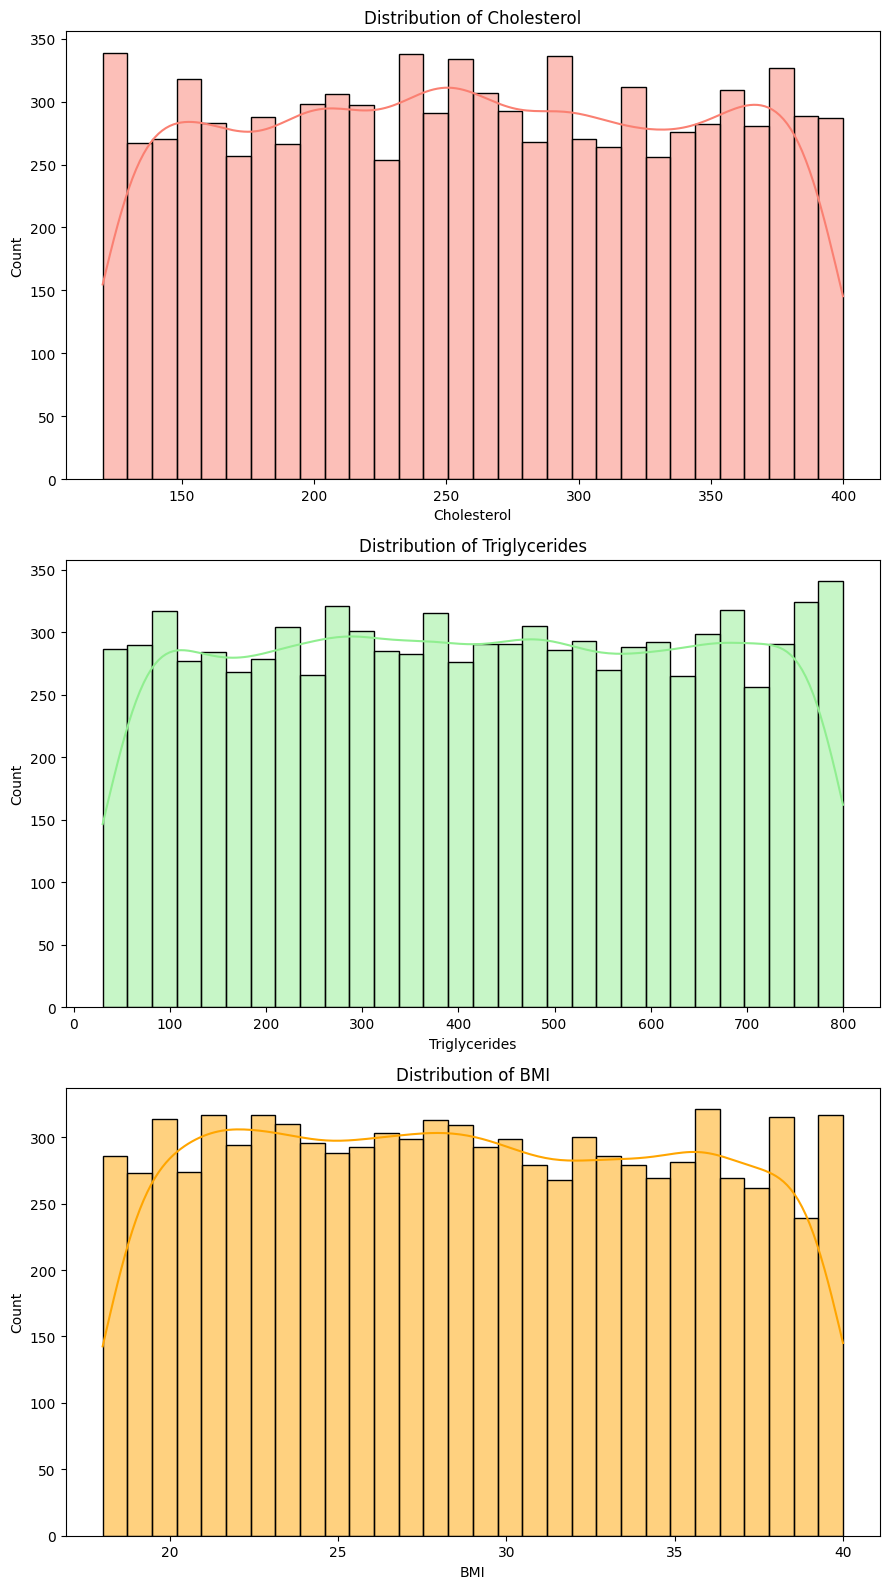

In [761]:
# Create a figure and 3 subplots in 1 column
fig, axes = plt.subplots(3, 1, figsize=(9, 16))

# Plotting histograms for each variable
sns.histplot(df['Cholesterol'], bins=30, kde=True, color='salmon', ax=axes[0], edgecolor='black')
axes[0].set_title('Distribution of Cholesterol')

sns.histplot(df['Triglycerides'], bins=30, kde=True, color='lightgreen', ax=axes[1], edgecolor='black')
axes[1].set_title('Distribution of Triglycerides')

sns.histplot(df['BMI'], bins=30, kde=True, color='orange', ax=axes[2], edgecolor='black')
axes[2].set_title('Distribution of BMI')


# Show result
plt.tight_layout()
plt.show()

**Explanation:**
1. Distribusi Kolesterol:
    - Rentang kadar kolesterol berkisar dari sekitar 100 mg/dL hingga 400 mg/dL. Distribusi kolesterol tampaknya cukup merata, meskipun terdapat sedikit fluktuasi dalam frekuensi di beberapa kelompok kadar kolesterol.
    - Puncak-puncak kecil pada sekitar 200-300 mg/dL menunjukkan bahwa banyak individu memiliki kadar kolesterol dalam rentang ini.

2. Distribusi Trigliserida:
    - Rentang kadar trigliserida berkisar dari sekitar 0 mg/dL hingga 800 mg/dL.
    - Distribusi trigliserida juga tampak cukup merata dengan sedikit fluktuasi dalam frekuensi di berbagai kelompok kadar trigliserida.
    - Tidak ada puncak yang sangat dominan, yang menunjukkan bahwa kadar trigliserida tersebar di berbagai rentang nilai.

3. Distribusi Benua:
    - Benua dengan jumlah individu terbanyak adalah Asia, diikuti oleh Eropa, Afrika, dan Amerika Utara.
    - Amerika Selatan dan Australia memiliki jumlah individu yang lebih sedikit dalam dataset ini.
    - Distribusi ini menunjukkan bahwa dataset memiliki representasi yang lebih besar dari individu yang tinggal di Asia dan Eropa.


Visualisasi ini memberikan gambaran yang jelas tentang distribusi kadar kolesterol, trigliserida, dan distribusi geografis individu dalam dataset. Informasi ini penting untuk dipertimbangkan dalam analisis lebih lanjut, terutama dalam konteks analisis kesehatan dan faktor risiko penyakit yang mungkin terkait dengan kadar kolesterol dan trigliserida serta faktor geografis.

#### **v. Count of Categorical Columns**

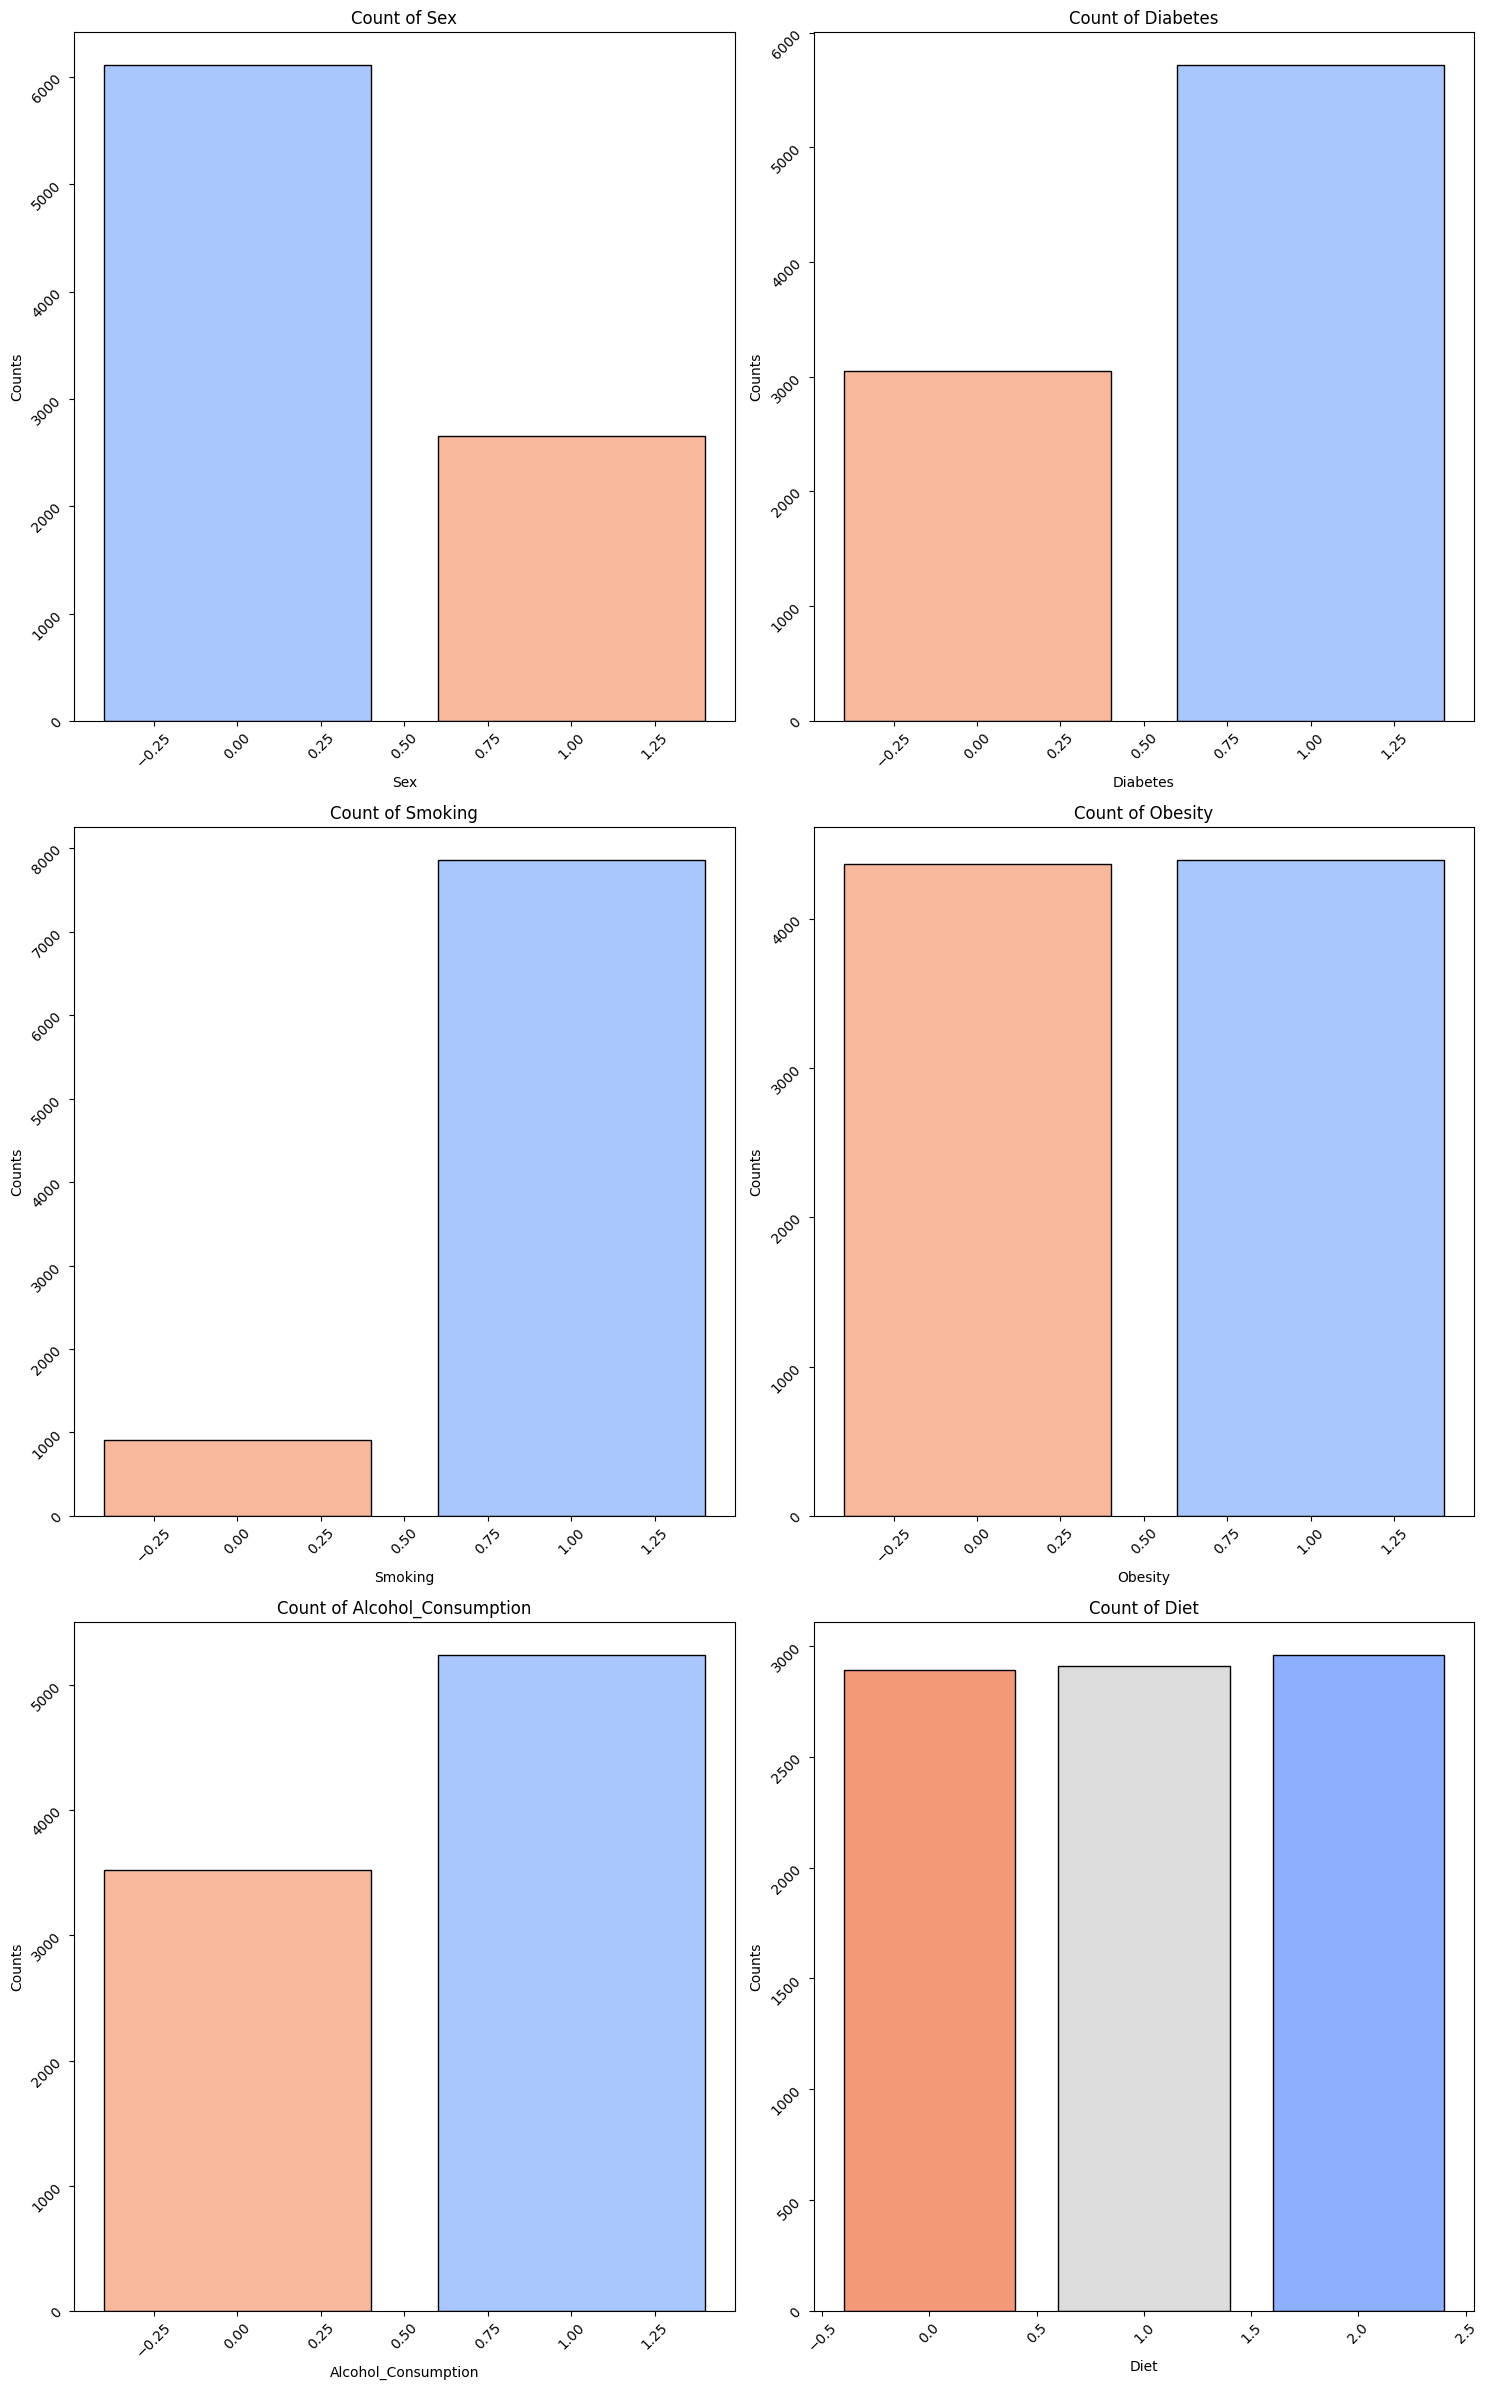

In [762]:
# Select categorical columns
categorical= ['Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Diet']

# Create figure and axes
fig, axes = plt.subplots(3, 2, figsize=(15, 24))
axes = axes.flatten()

# Looping to make the graph
for i, feature in enumerate(categorical):

    value_counts = df[feature].value_counts()
    palette = sns.color_palette("coolwarm", n_colors=len(value_counts))

    axes[i].bar(value_counts.index, value_counts.values, color=palette, edgecolor='black')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Counts')
    axes[i].set_title(f'Count of {feature}')
    axes[i].tick_params(labelrotation=45)

# Hide unused subplots since the number of features is odd
if len(categorical) % 2 != 0:
    axes[-1].axis('off')

# Show result
plt.tight_layout()
plt.show()


**Insight:**
- **Faktor Kesehatan dan Gaya Hidup:** Dari visualisasi ini, terlihat bahwa faktor kesehatan seperti diabetes, merokok, dan obesitas memiliki pengaruh besar dalam populasi yang dikaji. Hal ini menunjukkan pentingnya memfokuskan intervensi kesehatan pada faktor-faktor ini.

- **Variasi Geografis:** Perbedaan jumlah individu berdasarkan benua menunjukkan adanya variasi geografis dalam dataset. Hal ini penting untuk dipertimbangkan dalam analisis lebih lanjut untuk memahami bagaimana faktor-faktor ini berbeda antar wilayah.

- **Konsumsi Alkohol dan Pola Makan:** Variasi dalam konsumsi alkohol dan pola makan menunjukkan bahwa gaya hidup memainkan peran penting dalam kesehatan individu. Ini juga menunjukkan bahwa ada banyak faktor yang mempengaruhi kesehatan secara keseluruhan dalam populasi yang dikaji.

#### **vi. Count of Categorical Columns based on Heart Attack Risk**

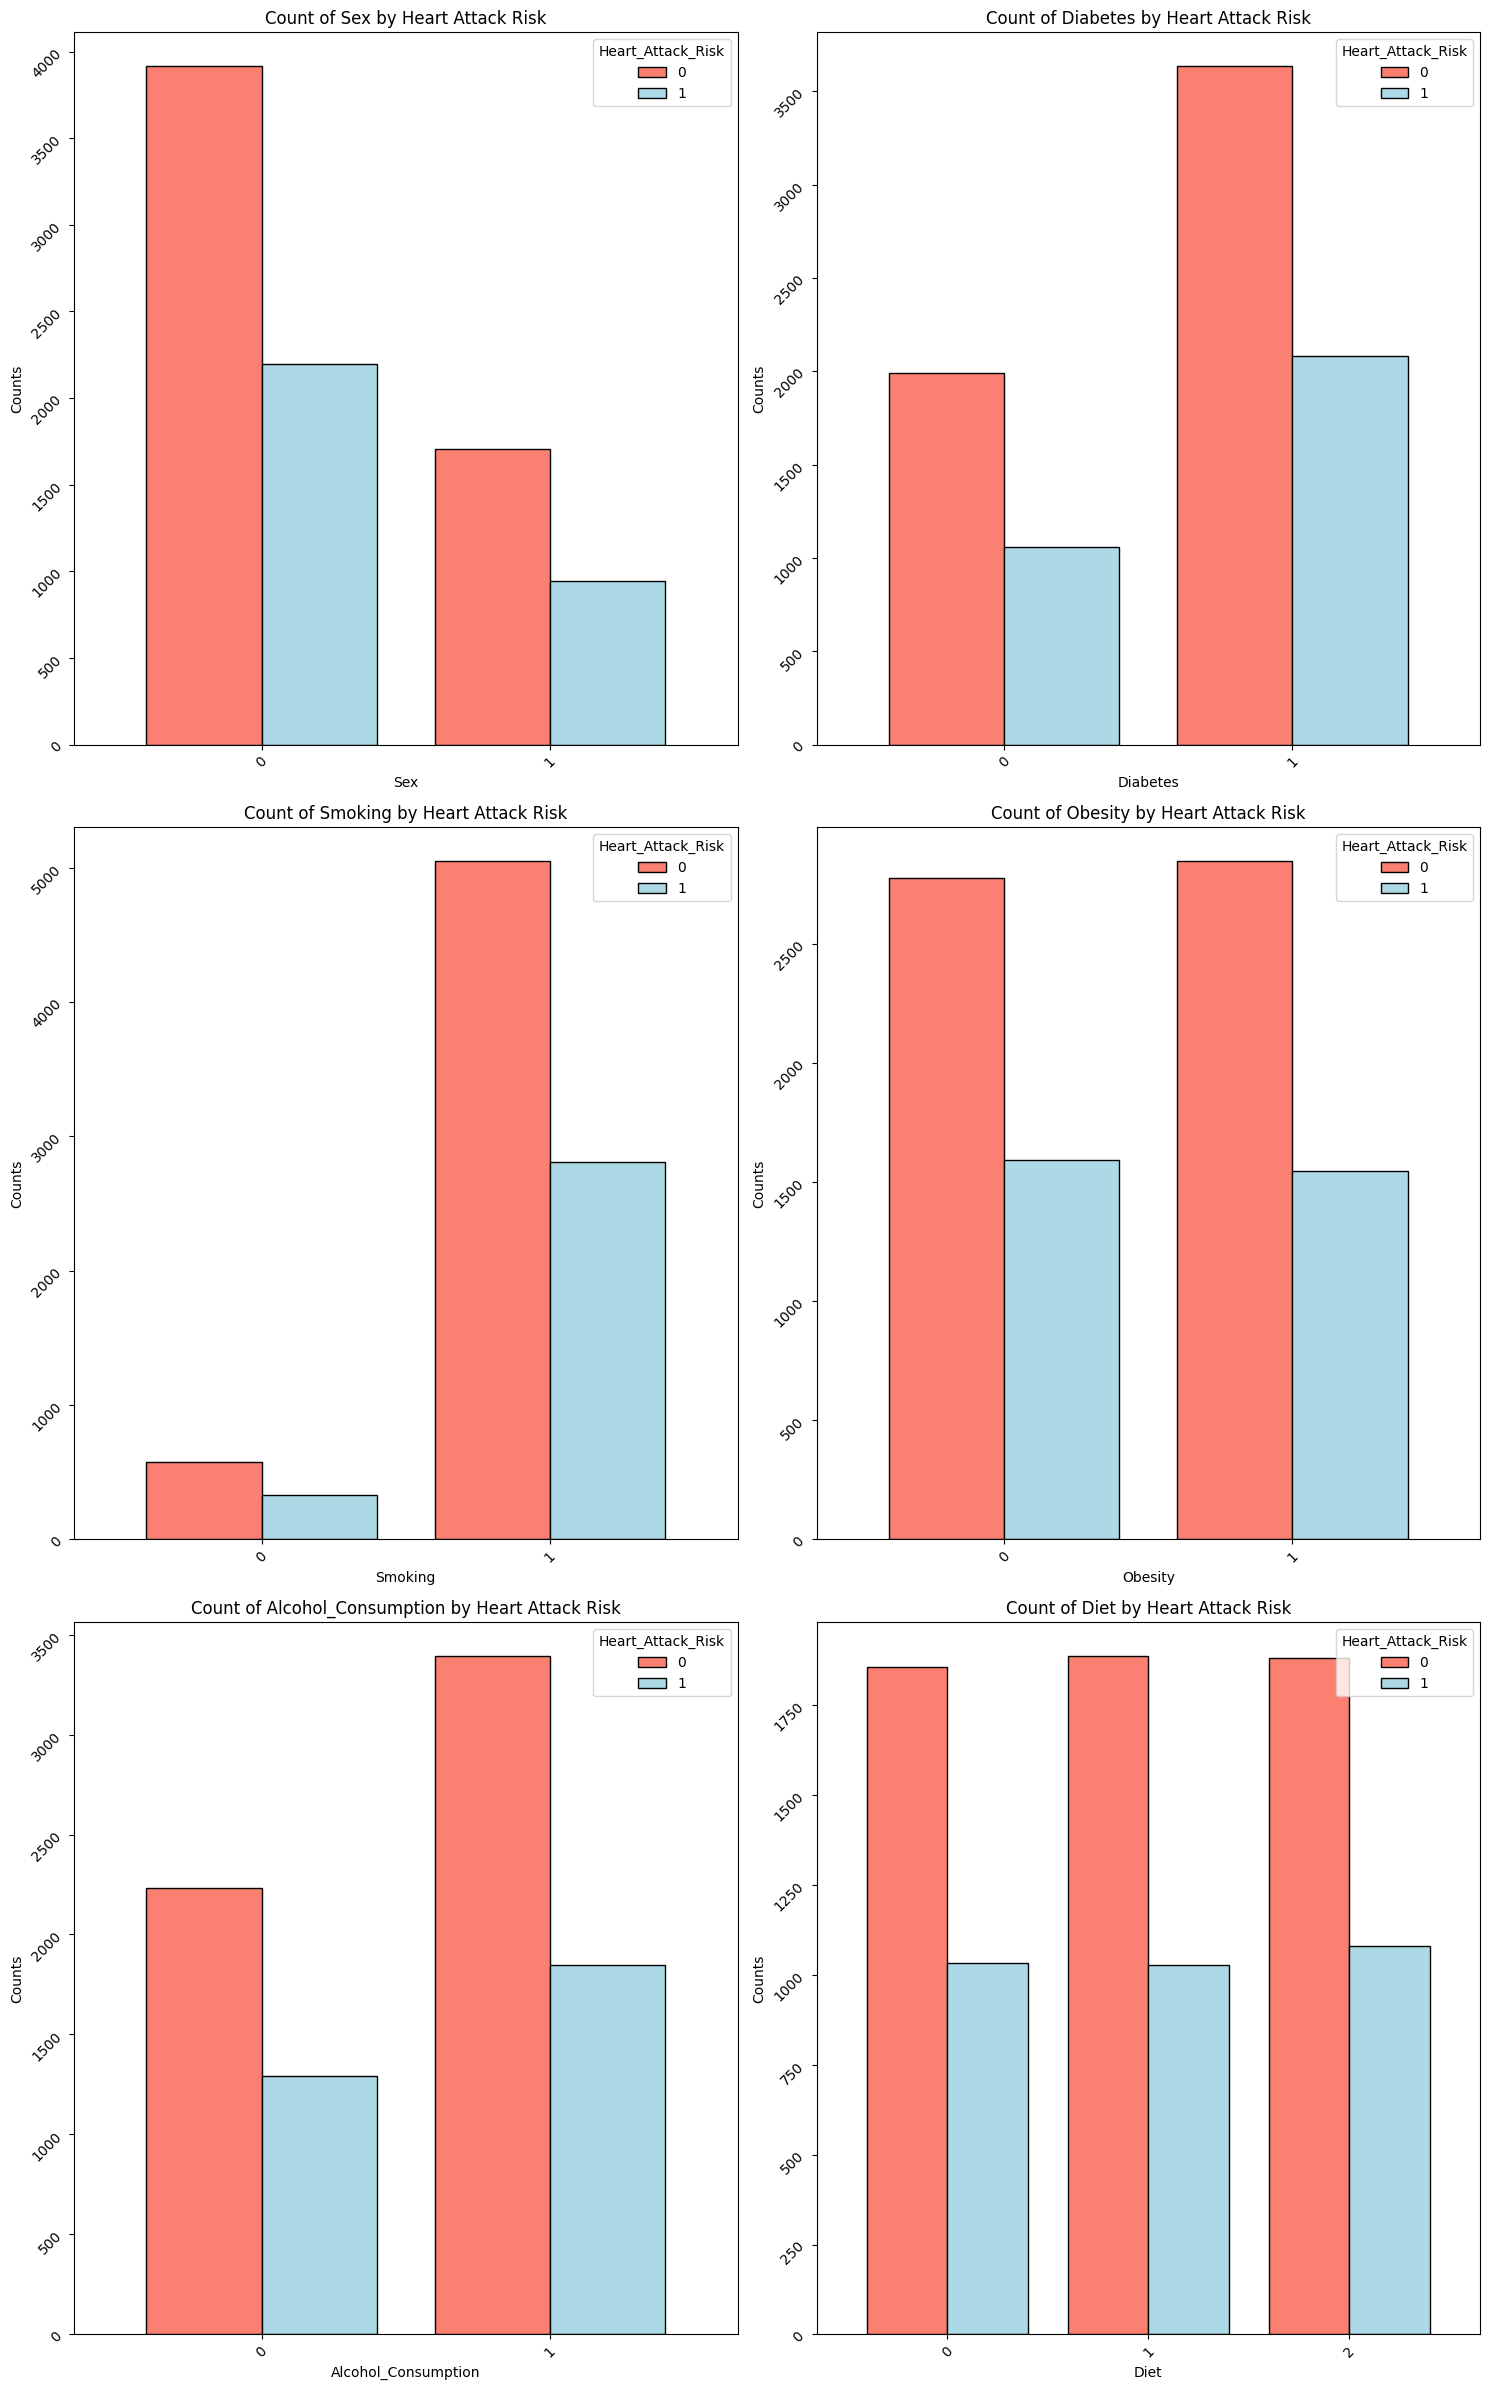

In [763]:
# Create figure and axes
fig, axes = plt.subplots(3, 2, figsize=(15, 24))
axes = axes.flatten()

# Loop to make the graph
for i, feature in enumerate(categorical):
    
    # Creating a dataframe that counts occurrences of categories split by stroke presence
    grouped = df.groupby([feature, 'Heart_Attack_Risk']).size().unstack(fill_value=0)

    # Plotting
    grouped.plot(kind='bar', ax=axes[i], color=['salmon', 'lightblue'], edgecolor='black', width=0.8)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Counts')
    axes[i].set_title(f'Count of {feature} by Heart Attack Risk')
    axes[i].tick_params(labelrotation=45)

# Hide unused subplots if the number of features is odd
if len(categorical) % 2 != 0:
    axes[-1].axis('off')

# Show result
plt.tight_layout()
plt.show()

**Explanation:**

- **Sex:**

    Lebih banyak pria yang berisiko mengalami serangan jantung dibandingkan wanita. Meskipun jumlah pria tanpa risiko serangan jantung juga lebih tinggi, rasio pria dengan risiko serangan jantung lebih tinggi dibandingkan wanita.

- **Diabetes:**

    Individu dengan diabetes memiliki risiko serangan jantung yang lebih tinggi dibandingkan individu tanpa diabetes. Ada lebih banyak individu dengan diabetes yang berisiko serangan jantung dibandingkan yang tidak berisiko.

- **Smoking:**

    Perokok memiliki risiko serangan jantung yang lebih tinggi dibandingkan non-perokok. Jumlah perokok yang berisiko serangan jantung jauh lebih tinggi dibandingkan non-perokok.

- **Obesity:**

    Individu dengan obesitas memiliki risiko serangan jantung yang lebih tinggi dibandingkan individu yang tidak mengalami obesitas.

- **Alcohol Consumption:**

    Konsumsi alkohol tinggi berkorelasi dengan risiko serangan jantung. Lebih banyak individu yang mengonsumsi alkohol dengan risiko serangan jantung dibandingkan yang tidak mengonsumsi alkohol.

- **Diet:**
    
    Individu dengan pola makan tidak sehat memiliki risiko serangan jantung yang lebih tinggi. Jumlah individu dengan pola makan tidak sehat yang berisiko serangan jantung lebih tinggi dibandingkan yang memiliki pola makan sehat.


Visualisasi ini membantu dalam memahami bagaimana berbagai faktor kategorikal seperti jenis kelamin, diabetes, merokok, obesitas, konsumsi alkohol, pola makan, dan lokasi geografis mempengaruhi risiko serangan jantung. Informasi ini penting dalam konteks kesehatan masyarakat untuk mengidentifikasi kelompok berisiko tinggi dan mengembangkan strategi pencegahan yang efektif.

#### **vii. Percentages of Heart Attack Risk**

Diagram pie di bawah menunjukkan bahwa sebagian besar orang yang berpartisipasi dalam pengambilan sampel ternyata tidak berisiko mengalami serangan jantung, sementara hanya 35.8% orang yang beresiko. Dalam konteks analisis data, ini menunjukkan ketidakseimbangan (imbalance) kelas, meskipun tidak terlalu ekstrem.

C:\Users\hp\AppData\Local\Temp\ipykernel_93468\3194358474.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


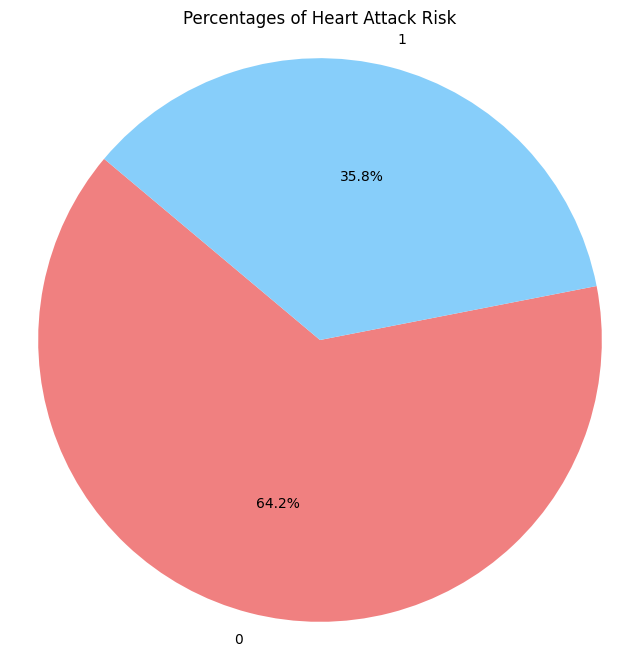

In [764]:
# Menghitung persentase Risiko Serangan Jantung
heart_attack_risk_counts = df['Heart_Attack_Risk'].value_counts()
heart_attack_risk_percentages = heart_attack_risk_counts / heart_attack_risk_counts.sum() * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(heart_attack_risk_percentages, labels=heart_attack_risk_percentages.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Percentages of Heart Attack Risk')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show result
fig.show()

**Explanation:**

**Diagram Pie**
- **Tidak Berisiko (No):** 64.2%. Mayoritas individu dalam dataset tidak berisiko mengalami serangan jantung. Hal ini menunjukkan bahwa lebih dari setengah populasi dalam dataset memiliki faktor-faktor yang mendukung kesehatan jantung yang baik.

- **Berisiko (Yes):** 35.8%. Persentase ini cukup signifikan dan menunjukkan bahwa lebih dari sepertiga populasi perlu perhatian lebih dalam hal pencegahan dan pengelolaan risiko serangan jantung.

**Insight:** 
1. Dengan hampir 36% populasi yang berisiko mengalami serangan jantung, penting untuk menerapkan program pencegahan dan intervensi yang efektif.
2. Edukasi mengenai gaya hidup sehat, pengelolaan stres, pola makan yang baik, dan pengendalian faktor risiko seperti diabetes, obesitas, dan merokok adalah langkah-langkah yang krusial.

## **5. Feature Engineering**


Setelah mengeksplorasi secara menyeluruh dan mendapatkan pemahaman yang lebih baik tentang data, langkah selanjutnya adalah melakukan pra-pemrosesan data dengan hanya memilih fitur yang relevan sebelum melatih model. Fitur-fitur ini juga perlu diubah untuk memastikan fitur-fitur tersebut berada dalam format yang sesuai untuk pelatihan model.

#### **a. Split X (Features) and y (Target)**

In [765]:
# Split between X and y
X = df.drop(['Heart_Attack_Risk'], axis=1)
y = df.Heart_Attack_Risk

In [766]:
# Print X
X

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Smoking,Obesity,Alcohol_Consumption,Diet,Stress_Level,BMI,Triglycerides,Continent
0,67,0,208,72,0,1,0,0,1,9,31.251233,286,0
1,21,0,389,98,1,1,1,1,0,1,27.194973,235,1
2,21,1,324,72,1,0,0,0,2,9,28.176571,587,2
3,84,0,383,73,1,1,0,1,1,9,36.464704,378,1
4,66,0,318,93,1,1,1,0,0,6,21.809144,231,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,0,121,61,1,1,0,1,2,8,19.655895,67,3
8759,28,1,120,73,1,0,1,0,2,8,23.993866,617,1
8760,47,0,250,105,0,1,1,1,1,5,35.406146,527,0
8761,36,0,178,60,1,1,0,0,0,5,27.294020,114,0


In [767]:
# Print y
y

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart_Attack_Risk, Length: 8763, dtype: int64

Sekarang, `variabel X` berisi fitur-fiturnya, sedangkan `variabel y` berisi kolom `Heart_Attack_Risk` sebagai variabel target.

In [768]:
# Print shapes untuk verifikasi
print(X.shape, y.shape)

(8763, 13) (8763,)


#### **b. Split Train-Set and Test-Set**

Setelah memisahkan `X` dan `y`, langkah selanjutnya adalah memisahkan data menjadi train-set dan test set untuk mengevaluasi performa model. Dalam hal ini, diputuskan untuk menggunakan 30% dari data sebagai test-set untuk memastikan evaluasi yang lebih stabil dan akurat.

In [769]:
# Splitting train-set and test-set using 'Train_test_split'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print train and test shape
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

# Show one of the variable 
X_train.head()

Train Size : (6134, 13)
Test Size : (2629, 13)


,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Smoking,Obesity,Alcohol_Consumption,Diet,Stress_Level,BMI,Triglycerides,Continent
865,20,0,376,55,1,1,0,1,0,10,34.065753,210,1
1817,52,0,309,61,0,1,1,0,2,1,36.773474,718,2
2673,56,0,196,100,0,1,0,1,0,5,33.363817,189,0
5736,31,0,254,75,0,1,1,1,0,5,20.906590,777,1
2605,39,0,319,67,0,1,1,0,2,8,30.533053,765,4


Data dibagi menjadi Train-set dan Test-set menggunakan `train_test_split` dengan ukuran test 0.3, artinya train-set sekarang berisi 70% dari total dataset, sebesar 6134 baris. Sedangkan test-set berisi 30% data atau 2629 baris. 
 **Stratify** digunakan untuk memastikan pemisahan yang merata antara data guratan dan non-guratan selama proses pemisahan.

#### **c. Handling Missing Value**

Pada eksplorasi sebelumnya sudah dicek dan disimpulkan bahwa tidak ada missing values pada dataset. Oleh karena itu, pada bagian ini hanya akan mengecek ulang dari 4 variabel yang dipisahkan sebelumnya, dan memang memang tidak terdapat missing values.

In [770]:
# Check missing value in X_train
X_train.isnull().sum()

Age                    0
Sex                    0
Cholesterol            0
Heart_Rate             0
Diabetes               0
Smoking                0
Obesity                0
Alcohol_Consumption    0
Diet                   0
Stress_Level           0
BMI                    0
Triglycerides          0
Continent              0
dtype: int64

In [771]:
# Check missing value in X_test
X_test.isnull().sum()

Age                    0
Sex                    0
Cholesterol            0
Heart_Rate             0
Diabetes               0
Smoking                0
Obesity                0
Alcohol_Consumption    0
Diet                   0
Stress_Level           0
BMI                    0
Triglycerides          0
Continent              0
dtype: int64

In [772]:
# Check missing value in y_train
y_train.isnull().sum()

0

In [773]:
# Check missing value in y_test
y_test.isnull().sum()

0

Dapat dilihat dari 4 variabel itu (**X_train, y_train, X_test, and y_test**) bahwa tidak terdapat missing values. Jadi kita bisa langsung ke next step tanpa khawatir ada yang hilang/missing data.

#### **d. Handling Outliers**

Setelah missing values, handling outlier diperlukan karena outlier dapat berdampak signifikan terhadap keakuratan dan keandalan analisis statistik dan model pembelajaran mesin. 

Handling outlier biasanya dilakukan pada data numerikal. jadi kolom-kolom kategorikal seperti `'Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Diet', 'Continent'`, akan dikecualikan pada handling outlier ini. 

Untuk cek outliernya, bisa dengan Skewness sebagai indikator awal potensi outlier. Maka perlu dilakukan perhitungan Skewness untuk tiap kolon numerik. 

In [774]:
# Mengidentifikasi kolom numerik dan kategorikal
num_cols = ['Age', 'Cholesterol', 'Heart_Rate', 'Stress_Level', 'BMI', 'Triglycerides']
cat_cols = ['Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Diet', 'Continent']

print("Kolom Numerik:", num_cols)
print("Kolom Kategorikal:", cat_cols)

Kolom Numerik: ['Age', 'Cholesterol', 'Heart_Rate', 'Stress_Level', 'BMI', 'Triglycerides']
Kolom Kategorikal: ['Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Diet', 'Continent']


In [775]:
# Check total unique values
X_train.nunique()

Age                      73
Sex                       2
Cholesterol             281
Heart_Rate               71
Diabetes                  2
Smoking                   2
Obesity                   2
Alcohol_Consumption       2
Diet                      3
Stress_Level             10
BMI                    6134
Triglycerides           771
Continent                 6
dtype: int64

Karena semua kolom numerik memiliki banyak nilai unik, maka tepat untuk menangani outlier di semua kolom ini. Langkah pertama adalah memeriksa skewness setiap kolom untuk menentukan apakah distribusi tersebut mengikuti distribusi normal, skewed, or extremely skewed. 

In [776]:
# Create function to check skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

# Calculate skewness of all numeric columns
skewness_results = check_skewness(X_train, 'Age', 'Cholesterol', 'Heart_Rate', 'Stress_Level', 'BMI', 'Triglycerides')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")
    

Age: 0.027419976423290755
Cholesterol: 0.003798419146856446
Heart_Rate: -0.008188544865771445
Stress_Level: 0.007214295878770272
BMI: 0.0398461743597097
Triglycerides: 0.0047712996547453895


In [777]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5:
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")


Normal: ['Age', 'Cholesterol', 'Heart_Rate', 'Stress_Level', 'BMI', 'Triglycerides']
Skewed: []
Extreme Skewed: []


Semua kolom numerik berdistribusi normal. Tidak ada yang berdistribusi skewed atau extreme skewed. 

***1. Menghitung Persentase Outlier Menggunakan Z-Score***

In [778]:
# Create function to calculate outlier percentages using Z-score method
def calculate_outlier_percentages(df, columns, method='normal', distance=3):
    for variable in columns:
        if method == 'normal':
            std_dev = df[variable].std()
            mean_val = df[variable].mean()
            lower_boundary = mean_val - (distance * std_dev)
            upper_boundary = mean_val + (distance * std_dev)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100
        
        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# Mengidentifikasi kolom numerik
normal_columns = ['Age', 'Cholesterol', 'Heart_Rate', 'Stress_Level', 'BMI', 'Triglycerides']

# Menghitung persentase outlier untuk kolom numerik menggunakan metode normal
calculate_outlier_percentages(X_train, normal_columns)


Percentage of outliers in Age: 0.00%
Percentage of outliers in Cholesterol: 0.00%
Percentage of outliers in Heart_Rate: 0.00%
Percentage of outliers in Stress_Level: 0.00%
Percentage of outliers in BMI: 0.00%
Percentage of outliers in Triglycerides: 0.00%


***2. Menyaring Outlier Menggunakan Z-Score***

In [779]:
# Menghitung Z-score untuk setiap kolom numerik
z_scores = np.abs(stats.zscore(X_train[num_cols]))

# Menyaring baris dengan Z-score di luar kisaran -3 hingga 3
filtered_entries = (z_scores < 3).all(axis=1)
X_train_filtered = X_train[filtered_entries]
y_train_filtered = y_train[filtered_entries]

# Mencetak ukuran data asli dan data yang sudah difilter
original_shape = X_train.shape
filtered_shape = X_train_filtered.shape

original_shape, filtered_shape


((6134, 13), (6134, 13))

Penanganan outlier penting meskipun data memiliki distribusi normal, karena outlier yang ekstrem tetap dapat mempengaruhi kinerja model. Outlier pada dataset ini di cek menggunakan metode Z-Score, untuk mengidentifikasi dan menangani outlier dalam data. 

Setelah di cek. semua kolom numerik memiliki 0% outlier. 

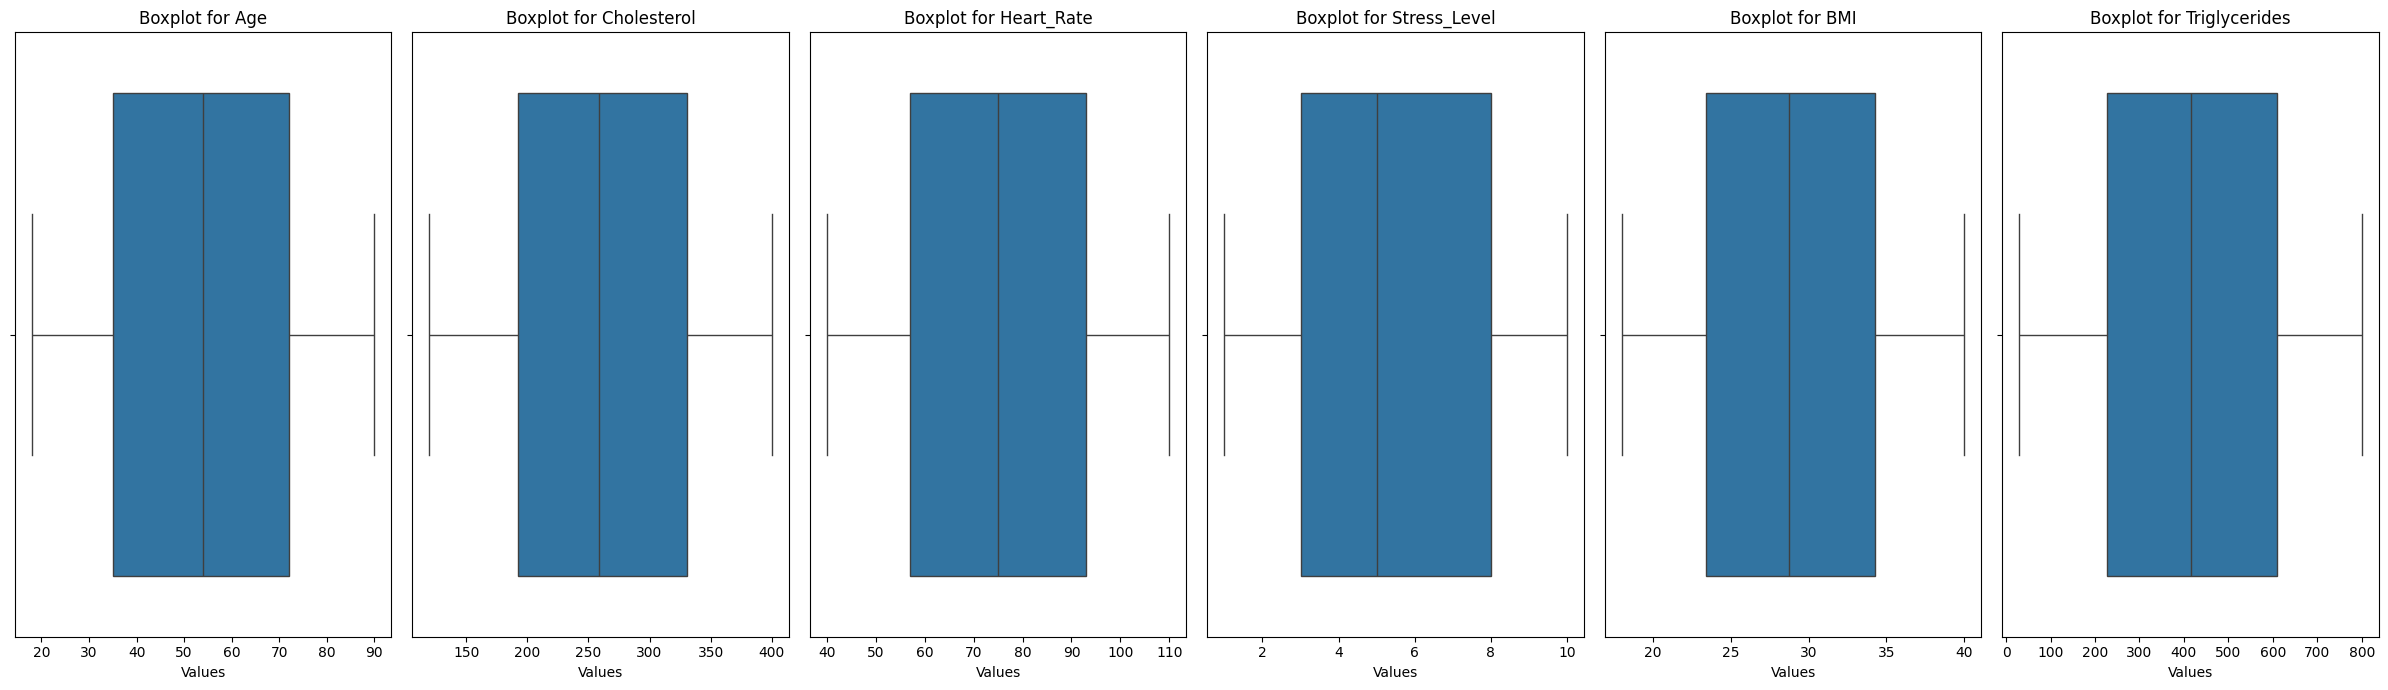

In [780]:
# Create a figure and subplots for normal columns
fig, axes = plt.subplots(1, 6, figsize=(24, 7))

# Boxplot untuk kolom numerik yang normal
for i, col in enumerate(normal_columns):
    sns.boxplot(data=X_train[col], orient="h", ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")
    axes[i].set_xlabel("Values")

# Display the plot
plt.tight_layout()
plt.show()

Tidak adanya lingkaran di luar box in the boxplot menunjukkan tidak adanya outlier pada data setelah penerapan metode Z-Score.

#### **e. Feature Selection**

Setelah handling outlier, dilakukan feature selection untuk mengidentifikasi feature yang paling relevan untuk memahami target variabel, menyederhanakan model, dan membuang feature yang kurang berpengaruh. 

Langkah pertama adalah menggabungkan `X_train` dan `y_train`, sehingga memungkinkan penentuan korelasi antara variabel target dan fitur.

In [781]:
# Get Numerical Columns and Categorical Columns
print('Num Columns : ', num_cols)
print('Cat Columns : ', cat_cols)

Num Columns :  ['Age', 'Cholesterol', 'Heart_Rate', 'Stress_Level', 'BMI', 'Triglycerides']
Cat Columns :  ['Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Diet', 'Continent']


In [782]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1)

# Show X_train
concat_train.head()

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Smoking,Obesity,Alcohol_Consumption,Diet,Stress_Level,BMI,Triglycerides,Continent,Heart_Attack_Risk
865,20,0,376,55,1,1,0,1,0,10,34.065753,210,1,1
1817,52,0,309,61,0,1,1,0,2,1,36.773474,718,2,1
2673,56,0,196,100,0,1,0,1,0,5,33.363817,189,0,0
5736,31,0,254,75,0,1,1,1,0,5,20.906590,777,1,0
2605,39,0,319,67,0,1,1,0,2,8,30.533053,765,4,1


Analisis ini menggunakan metode **Phik Correlation**. Phik mengidentifikasi korelasi antara fitur dan variabel target. Dalam analisis ini, Phik akan digunakan untuk memilih fitur kategorikal.

In [783]:
# Create function to correlate features with stroke
def compute_phik_correlation(df, columns):
    subset = df[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix['Heart_Attack_Risk']

# Define the list of columns for each subset
cat_columns = ['Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Diet', 'Continent', 'Heart_Attack_Risk']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, cat_columns)

# Print result
print(correlation)


interval columns not set, guessing: ['Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Diet', 'Heart_Attack_Risk']
Sex                    0.000000
Diabetes               0.010977
Smoking                0.000000
Obesity                0.019236
Alcohol_Consumption    0.008484
Diet                   0.000000
Continent              0.000000
Heart_Attack_Risk      1.000000
Name: Heart_Attack_Risk, dtype: float64


Hasilnya menampilkan korelasi antara semua fitur kategorikal dan variabel target `Heart_Attack_Risk`. Skornya berkisar antara 0 hingga 1, dimana 0 berarti tidak ada hubungan dan 1 menunjukkan hubungan yang kuat. 

**threshold** yang dipilih untuk analisis yaitu **0.01**. Jadi, hanya variabel dengan nilai korelasi > 0.01 yang dianggap memiliki korelasi dengan variabel target. Oleh karena itu, variabel yang dipilih berdasarkan threshold ini adalah `Diabetes` dan `Obesity` dari fitur kategorikal.

Fitur yang tidak menunjukkan hubungan/korelasi apa pun dengan `Heart_Attack_Risk` akan didrop dari kumpulan data `X_train` dan `y_train`.

In [784]:
# Define threshold for correlation
threshold = 0.01

In [785]:
# Memilih Fitur Berdasarkan Nilai Korelasi
selected_features = correlation[correlation > threshold].index.tolist()
selected_features.remove('Heart_Attack_Risk')
print("Selected Features based on Phi-K correlation:", selected_features)

# Extract selected features from training and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Selected Features based on Phi-K correlation: ['Diabetes', 'Obesity']


Variabel `'Diabetes' dan 'Obesity'` menunjukkan keterkaitan / korelasi dengan `Heart_Attack_Risk` dan dianggap penting untuk memprediksi variabel target. 

In [786]:
# Menghapus Kolom Tidak Relevan dari X_train
X_train.drop(['Sex', 'Smoking', 'Alcohol_Consumption', 'Diet', 'Continent'], axis=1,  inplace=True)

# Menghapus Kolom Tidak Relevan dari X_test:
X_test.drop(['Sex', 'Smoking', 'Alcohol_Consumption', 'Diet', 'Continent'], axis=1,  inplace=True)

In [787]:
# Show columns
print(X_train.columns)
print(X_test.columns)

Index(['Age', 'Cholesterol', 'Heart_Rate', 'Diabetes', 'Obesity',
       'Stress_Level', 'BMI', 'Triglycerides'],
      dtype='object')
Index(['Age', 'Cholesterol', 'Heart_Rate', 'Diabetes', 'Obesity',
       'Stress_Level', 'BMI', 'Triglycerides'],
      dtype='object')


In [788]:
# Display X_train
X_train

,Age,Cholesterol,Heart_Rate,Diabetes,Obesity,Stress_Level,BMI,Triglycerides
865,20,376,55,1,0,10,34.065753,210
1817,52,309,61,0,1,1,36.773474,718
2673,56,196,100,0,0,5,33.363817,189
5736,31,254,75,0,1,5,20.906590,777
2605,39,319,67,0,1,8,30.533053,765
...,...,...,...,...,...,...,...,...
4832,28,195,46,0,0,10,19.357652,285
2896,67,376,73,0,1,5,24.547281,780
7409,71,394,109,0,1,10,25.132939,756
2942,53,399,63,0,1,1,24.082842,488


Variabel `X_train` dan `X_test` sekarang ini terdiri dari kolom-kolom yang memiliki korelasi dengan `Heart_Attack_Risk`.

#### **f. Cardinality Check**

Setelah memilih fitur kategori berdasarkan korelasinya dengan variabel target, langkah selanjutnya adalah Check Cardinality. Ini dilakukan untuk menentukan apakah kolom kategori memiliki cardinality yang low atau high. Kolom yang memiliki cardinality yang tinggi perlu ditangani dengan membaginya ke kelompok-kelompok yang lebih kecil untuk menghindari bias pada proses Machine Learning. 

In [789]:
# Memeriksa jumlah nilai unik dalam kolom 'Diabetes' dan 'Obesity'
num_unique_diabetes = df['Diabetes'].nunique()
num_unique_obesity = df['Obesity'].nunique()

# Menampilkan hasilnya
print('Number of categories in the variable Diabetes  : {}'.format(num_unique_diabetes))
print('Number of categories in the variable Obesity   : {}'.format(num_unique_obesity))

Number of categories in the variable Diabetes  : 2
Number of categories in the variable Obesity   : 2


Karena fitur kategorikal pada kolom `Diabetes` dan `Obesity` hannya memiliki 2 nilai unik, maka tidak perlu handling cardinality. 

#### **g. Imbalance Data Handling**

Seperti yang telah disebutkan sebelumnya, variabel target pada analisis ini cukup tidak seimbang (imbalanced), dengan kelas `Heart-Attack` hanya sekitar 35.8% dari data dan kelas `Non-Heart-Attack` mewakili 64.2%. Data yang tidak seimbang dapat menyebabkan model bias terhadap kelas mayoritas.

Untuk mengatasi hal ini, metode SMOTENC akan digunakan. SMOTENC adalah salah satu teknik oversampling yang bekerja dengan cara membuat kelas minoritas lebih menonjol, sehingga model dapat belajar membedakan antara kelas-kelas tersebut dengan lebih baik. Kita akan menggunakan SMOTENC dalam kasus ini karena fitur-fitur kami masih mengandung fitur kategorikal.

In [790]:
X_train

,Age,Cholesterol,Heart_Rate,Diabetes,Obesity,Stress_Level,BMI,Triglycerides
865,20,376,55,1,0,10,34.065753,210
1817,52,309,61,0,1,1,36.773474,718
2673,56,196,100,0,0,5,33.363817,189
5736,31,254,75,0,1,5,20.906590,777
2605,39,319,67,0,1,8,30.533053,765
...,...,...,...,...,...,...,...,...
4832,28,195,46,0,0,10,19.357652,285
2896,67,376,73,0,1,5,24.547281,780
7409,71,394,109,0,1,10,25.132939,756
2942,53,399,63,0,1,1,24.082842,488


Idealnya, ketika menerapkan SMOTENC seharusnya dilakukan setelah encoding dan scaling dan tepat setelah pemodelan. Namun, kita tidak dapat memasukkan SMOTENC ke dalam pipeline model karena dapat mengganggu proses prediksi pada data uji (X_test dan y_test), karena SMOTENC hanya diizinkan untuk fitted di X_train.

In [791]:

# Index categorical_features
categorical_features = [3, 4]

# Definisikan SMOTENC untuk menangani data yang tidak seimbang
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Resample data training menggunakan SMOTENC
X_train_res, y_train_res = smotenc.fit_resample(X_train, y_train)

# Tampilkan distribusi kelas sebelum SMOTENC
print('Distribusi kelas sebelum SMOTE:', Counter(y_train))
# Tampilkan distribusi kelas setelah SMOTENC
print('Distribusi kelas setelah SMOTENC:', Counter(y_train_res))


Distribusi kelas sebelum SMOTE: Counter({0: 3937, 1: 2197})
Distribusi kelas setelah SMOTENC: Counter({1: 3937, 0: 3937})


In [792]:
# Print value counts after sampling dalam presentase 
print('Non-Heart-Attack:', y_train_res.value_counts()[0], '/', round(y_train_res.value_counts()[0]/len(y_train_res) * 100,2), '% of the dataset')
print('Heart-Attack:', y_train_res.value_counts()[1], '/',round(y_train_res.value_counts()[1]/len(y_train_res) * 100,2), '% of the dataset')

Non-Heart-Attack: 3937 / 50.0 % of the dataset
Heart-Attack: 3937 / 50.0 % of the dataset


SMOTENC membantu dalam menyeimbangkan jumlah contoh antara kelas mayoritas (Non-Heart-Attack) dan kelas minoritas (Heart-Attack), sehingga model dapat belajar lebih baik dan memberikan hasil yang lebih akurat. 

Setelah menerapkan SMOTENC, sekarang training setnya berjumlah 7874 dengan **3937** memiliki risiko serangan jantung dan **3937** tidak memiliki risiko serangan jantung. jadi datanya sudah balanced sekarang. 

#### **h. Split Numerical and Categorical Columns**

Untuk melanjutkan feature transformation, variabel kini dipisahkan berdasarkan tipe data dan distribusinya. Pemisahan ini diperlukan karena setiap variabel memerlukan metode transformasi yang berbeda.

In [793]:
# Split numerical and categorical columns

num_normal = ['Age', 'Cholesterol', 'Heart_Rate', 'Stress_Level', 'BMI', 'Triglycerides']
cat_encoded = ['Diabetes', 'Obesity']

print(f'Numerical normal columns:\n{num_normal}')
print(f'Categorical encoded columns:\n{cat_encoded}')

Numerical normal columns:
['Age', 'Cholesterol', 'Heart_Rate', 'Stress_Level', 'BMI', 'Triglycerides']
Categorical encoded columns:
['Diabetes', 'Obesity']


#### **i. Feature Transformation (Scaling & Encoding)**

Setelah mendefinisikan variabel, langkah selanjutnya adalah proses transformasi. Pada bagian ini, beberapa transformasi diterapkan:

- Kolom numerik dengan distribusi normal akan diskalakan menggunakan StandardScaler.
- Kolom kategorikal sudah dikodekan sehingga akan diteruskan apa adanya.

StandardScaler dianggap cocok untuk dataset ini karena StandardScaler dirancang untuk algoritma yang sensitif terhadap feature scaling, yang dalam hal ini adalah KNN dan SVM. Sedangkan untuk model seperti Decision Tree, tidak sensitif terhadap penskalaan fitur tetapi StandardScaler masih dapat mengakomodasi proses penskalaan untuk algoritma tersebut.

In [794]:
# Preprocessing using ColumnTransformer

scaler_std = StandardScaler()

preprocess = ColumnTransformer(transformers = [
            ('num_normal', scaler_std, num_normal)],
            remainder='passthrough')

Semua transformasi dilakukan dalam `ColumnTransformer` yang mencakup scaler. Kolom kategorikal sudah dalam bentuk numerik jadi tidak perlu encoding lagi. 

## **6. Model Definition**


Setelah semua fitur di preproses, analisis dilanjutkan dengan model definition. Enam model digunakan dalam analisis ini dan berikut adalah alasannya:

1. **KNN (K-Nearest Neighbors)**: Cocok untuk data yang tidak membuat asumsi kuat tentang distribusi data.

2. **SVC (Support Vector Classifier)**: Efektif untuk data yang dapat dipisahkan secara linear maupun non-linear, membuatnya serbaguna untuk dataset ini.

3. **Logistic Regression**: Model sederhana namun kuat yang memberikan hasil yang mudah diinterpretasikan dan cocok untuk tugas klasifikasi biner.

4. **Decision Tree**: Bermanfaat untuk menangkap hubungan kompleks dalam data dan mudah diinterpretasikan.

5. **XGBoost**: Algoritma gradient boosting yang kuat, dikenal karena kemampuannya menangani data yang tidak seimbang, membuatnya cocok untuk analisis ini.

6. **Random Forest**: Metode ensemble bagging yang menggabungkan beberapa decision tree untuk meningkatkan akurasi dan mengurangi overfitting.


Analisis ini berfokus pada **Recall** sebagai metrik penilaian utama karena tujuannya adalah mengembangkan model yang mampu memprediksi kasus risiko serangan jantung dengan akurat. Meminimalkan False Negatives, di mana model memprediksi tidak serangan jantung tetapi hasil sebenarnya adalah serangan jantung, itu sangat penting dan krusial. Oleh karena itu, **Recall** diprioritaskan di atas Precision.

Meskipun menargetkan **Recall** yang lebih tinggi mungkin dapat mengurangi Precision karena meningkatnya False Positives, tradeoff ini tidak dapat dihindari. Tingkat False Positive yang lebih tinggi berarti lebih banyak kesalahan klasifikasi kasus non-heart-attack sebagai heart-attack, yang berpotensi mengganggu individu. Namun, apakah tradeoff ini dapat diterima tergantung pada tujuan bisnis dan akurasi yang diinginkan. Dalam skenario ini, memprioritaskan Recall yang lebih tinggi untuk melihat lebih banyak kasus serangan lebih disukai, meskipun menyebabkan Precision yang lebih rendah.

Untuk prediksi yang berhubungan dengan kesehatan, sangat berbahaya untuk mendiagnosis orang yang sakit sebagai orang yang sehat karena mereka tidak dapat memperoleh pengobatan atau pencegahan yang diperlukan dan dapat menimbulkan masalah yang lebih besar bila suatu penyakit tidak ditangani secepatnya. .

In [795]:
# Define model using pipeline

pipe_knn = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', KNeighborsClassifier(n_neighbors=9))])
pipe_svc = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', SVC())])
pipe_log = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', LogisticRegression())])
pipe_dt = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))]) 
pipe_xgb = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', XGBClassifier(max_depth=3, random_state=42))])
pipe_rf = ImbPipeline(steps=[('preprocess', preprocess), ('classifier', RandomForestClassifier(max_depth=3, random_state=42))])



**Explanation:**

KNN memerlukan penentuan jumlah tetangga (n_neighbors) untuk memastikan keadilan dengan model lain karena KNN cenderung mencapai skor 1. Demikian pula, untuk algoritma berbasis pohon keputusan (decision tree-based) seperti Decision Tree, Random Forest, dan XGBoost, menentukan kedalaman maksimum (max_depth) penting untuk mencegah overfitting dan memastikan keadilan dengan model lain di cross validation.

## **7. Model Training and Model Evaluation**


Model terbaik di antara 6 model ditentukan menggunakan **cross-validation**, yaitu teknik untuk mengevaluasi performa dan generalisasi model.

In [796]:
# Setup the cross-validation framework with Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Cross-validation dilakukan untuk setiap model, termasuk Logistic Regression, SVC, KNN, Decision Tree, Random Forest, dan XGBoost. Dengan menggunakan 5-fold cross-validation, setiap model dilatih dan diuji lima kali, dan nilai recall dihitung untuk setiap iterasi.

In [797]:
# Training dengan Cross Validation

cv_knn = cross_val_score(pipe_knn, X_train_res, y_train_res, cv=kf, scoring='recall', n_jobs=-1) 
cv_svc = cross_val_score(pipe_svc, X_train_res, y_train_res, cv=kf, scoring='recall', n_jobs=-1) 
cv_log = cross_val_score(pipe_log, X_train_res, y_train_res, cv=kf, scoring='recall', n_jobs=-1)
cv_dt = cross_val_score(pipe_dt, X_train_res, y_train_res, cv=kf, scoring='recall', n_jobs=-1)
cv_xgb = cross_val_score(pipe_xgb, X_train_res, y_train_res, cv=kf, scoring='recall', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train_res, y_train_res, cv=kf, scoring='recall', n_jobs=-1)


In [798]:
# Find best model from Cross Validation
model = []
cv_score = 0

for cv, name in zip([cv_log, cv_svc, cv_knn, cv_dt, cv_rf, cv_xgb],
                    ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    print(name)
    print('Recall - All - Cross Validation', cv)
    print('Recall - Mean - Cross Validation', cv.mean())
    print('Recall - Std - Cross Validation:', cv.std())
    print('Recall - Range - Cross Validation', (cv.mean() - cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean() > cv_score:
        cv_score = cv.mean()
        model = name
    else:
        pass

print('Best Model:', model)
print('Cross Validation Mean from Best Model:', cv_score) 

Logistic Regression
Recall - All - Cross Validation [0.57741117 0.56725888 0.5819568  0.59212198 0.55273189]
Recall - Mean - Cross Validation 0.5742961448409756
Recall - Std - Cross Validation: 0.013421545717444298
Recall - Range - Cross Validation 0.5608745991235313 - 0.5877176905584198
--------------------------------------------------
SVC
Recall - All - Cross Validation [0.66497462 0.62944162 0.66836086 0.65819568 0.65692503]
Recall - Mean - Cross Validation 0.6555795638516762
Recall - Std - Cross Validation: 0.01373662934149754
Recall - Range - Cross Validation 0.6418429345101786 - 0.6693161931931737
--------------------------------------------------
KNN
Recall - All - Cross Validation [0.63832487 0.63705584 0.66200762 0.65946633 0.65819568]
Recall - Mean - Cross Validation 0.6510100684343939
Recall - Std - Cross Validation: 0.010951915809473085
Recall - Range - Cross Validation 0.6400581526249208 - 0.661961984243867
--------------------------------------------------
Decision Tree


Setelah mengevaluasi hasil cross-validation untuk Recall di beberapa model, analisis tersebut mengidentifikasi **Decision Tree (DT)** sebagai model dengan kinerja terbaik. RF mencapai rata-rata Recall sebesar **0.7538**, yang menunjukkan kemampuannya dalam memprediksi kasus serangan jantung secara efektif. Kinerja unggul dalam menangkap kasus-kasus positif yang sebenarnya, sambil tetap menjaga keseimbangan dengan False Positif, menjadikan `DT` pilihan yang direkomendasikan untuk memprediksi hasil serangan jantung dalam analisis ini.

In [799]:
# Define models using pipeline
models = {
    'KNN': pipe_knn,
    'SVC': pipe_svc,
    'Logistic Regression': pipe_log,
    'Decision Tree': pipe_dt,
    'Random Forest': pipe_rf,
    'XGBoost': pipe_xgb
}

results = {}

for model_name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, 
                                X_train_res, 
                                y_train_res, 
                                cv=kf, 
                                scoring='recall', 
                                n_jobs=-1)

    # Fit model
    model.fit(X_train_res, y_train_res)
    y_pred_train = model.predict(X_train_res)

    # Predict on test data
    y_pred_test = model.predict(X_test)
    
    # Evaluate model
    training_recall = recall_score(y_train_res, y_pred_train)
    testing_recall = recall_score(y_test, y_pred_test)
    
    # Store results
    results[model_name] = {
        'Training Recall Score': training_recall.mean(),
        'Testing Recall Score': testing_recall
    }

# Convert results to DataFrame
df_results = pd.DataFrame(results).T
df_results.columns = ['Training Recall Score', 'Test Recall Score']

# Print the DataFrame
print("Model Evaluation Results:")
df_results

Model Evaluation Results:


,Training Recall Score,Test Recall Score
KNN,0.756160,0.498938
SVC,0.702565,0.535032
Logistic Regression,0.577851,0.527601
Decision Tree,0.821184,0.733546
Random Forest,0.676657,0.547771
XGBoost,0.738379,0.485138


In [800]:
# Identify the best model based on cross-validation recall mean
best_model_name = df_results['Training Recall Score'].idxmax()
best_model_cv_recall = df_results.loc[best_model_name, 'Training Recall Score']
best_model_test_recall = df_results.loc[best_model_name, 'Test Recall Score']

print(f"Best Model: {best_model_name}")
print(f"Training Recall Score: {best_model_cv_recall}")
print(f"Test Recall: {best_model_test_recall}")

Best Model: Decision Tree
Training Recall Score: 0.8211836423672847
Test Recall: 0.7335456475583864


In [801]:
# Fit pipeline on the training data
pipe_dt.fit(X_train_res, y_train_res)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_normal',
                                                  StandardScaler(),
                                                  ['Age', 'Cholesterol',
                                                   'Heart_Rate', 'Stress_Level',
                                                   'BMI', 'Triglycerides'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

Proses ini menggambarkan bagaimana model Decision Tree dilatih dan digunakan untuk melakukan prediksi pada kedua set data, yaitu train set dan test set, setelah melalui proses preprocessing yang ditentukan dalam pipeline.

In [802]:
# Get predictions for both training and test data
y_pred_train = pipe_dt.predict(X_train_res)
y_pred_test = pipe_dt.predict(X_test)

### **Model Evaluation**
**Summary of Recall Score of All Models**

Setelah model-model didefinisikan, kemudian memprediksi `y_train dan y_test` menggunakan setiap model dan menemukan skor **recall** yang sesuai untuk setiap model default. Secara singkat, semua model menghadapi masalah overfitting. Namun, overfitting diharapkan terjadi karena kami menggunakan oversampling data balancing (SMOTENC), yang menyebabkan data menjadi overfit karena model akan lebih mudah mempelajari set data latihan. 

Hasil perhitungan skor recall untuk train dan test set untuk setiap model dirangkum di bawah ini. 

- **Model KNN** mengalami overfitting signifikan dengan perbedaan skor recall sebesar 0.25 antara train dan test set. Perbedaan ini menunjukkan bahwa model KNN terlalu banyak belajar dari data latihan dan tidak dapat melakukan generalisasi dengan baik pada data uji. Perbedaan ini dianggap terlalu besar, sehingga tidak akan melanjutkan dengan KNN.

- **Model SVM** juga mengalami overfitting, namun perbedaan antara skor recall latihan dan uji tidak sebesar model lainnya. Ini menunjukkan bahwa SVM masih memiliki potensi untuk menjadi model terbaik setelah tuning hyperparameter untuk mengurangi overfitting lebih lanjut.

- **Model Logistic Regression** menunjukkan perbedaan skor recall yang lebih kecil antara set latihan dan set uji, namun skor recall keseluruhan relatif lebih rendah dibandingkan dengan model lainnya. Ini menunjukkan bahwa Logistic Regression tidak terlalu overfit, tetapi juga tidak berkinerja sangat baik.

- **Model Decision Tree** menunjukkan overfitting yang lebih kecil dibandingkan dengan model lainnya. Meskipun skor recall untuk train set cukup tinggi, skor recall untuk test set juga cukup tinggi, menunjukkan bahwa model ini dapat melakukan generalisasi lebih baik dibandingkan dengan model lain yang diuji.

- **Model Random Forest** mengalami overfitting, dengan perbedaan skor recall sebesar 0.13 antara train dan test set
. Meskipun tidak sebesar beberapa model lain, perbedaan ini masih menunjukkan bahwa model ini belajar terlalu banyak dari train set. 

- Terakhir, **Model XGBoost** menunjukkan overfitting yang signifikan, dengan perbedaan skor recall sebesar 0.25 antara set latihan dan set uji. Meskipun XGBoost dikenal untuk mengurangi overfitting melalui boosting, hasil ini menunjukkan bahwa model ini masih mengalami masalah generalisasi.



Kesimpulannya, **Decision Tree dianggap sebagai model terbaik** karena skor recall relatif tinggi dan merupakan algoritma yang paling sedikit mengalami overfitting.

## **8. Model Optimization**


Bagian ini akan mengevaluasi performa model yang di fitted dan mencoba penyesuaian hyperparameter untuk mengoptimalkan hyperparameter model.

Seperti yang telah dibahas sebelumnya, model Decision Tree menghasilkan model dengan masalah **overfitting yang paling sedikit**. Oleh karena itu, akan dilakukan hyperparameter menggunakan GridSearch untuk model Decision Tree untuk mengurangi overfitting. Kemudian akan dibandingkan dengan Best model tanpa menggunakan hyperparameter. 

#### **i. Best Model without Hyperparameter Tuning**

In [803]:
print(classification_report(y_train_res, y_pred_train))
print(classification_report(y_test, y_pred_test))

# Print recall score
print('Recall Score - Train Set  : ', recall_score(y_train_res, y_pred_train)) 
print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.30      0.40      3937
           1       0.54      0.82      0.65      3937

    accuracy                           0.56      7874
   macro avg       0.58      0.56      0.53      7874
weighted avg       0.58      0.56      0.53      7874

              precision    recall  f1-score   support

           0       0.64      0.27      0.38      1687
           1       0.36      0.73      0.48       942

    accuracy                           0.44      2629
   macro avg       0.50      0.50      0.43      2629
weighted avg       0.54      0.44      0.42      2629

Recall Score - Train Set  :  0.8211836423672847
Recall Score - Test Set   :  0.7335456475583864


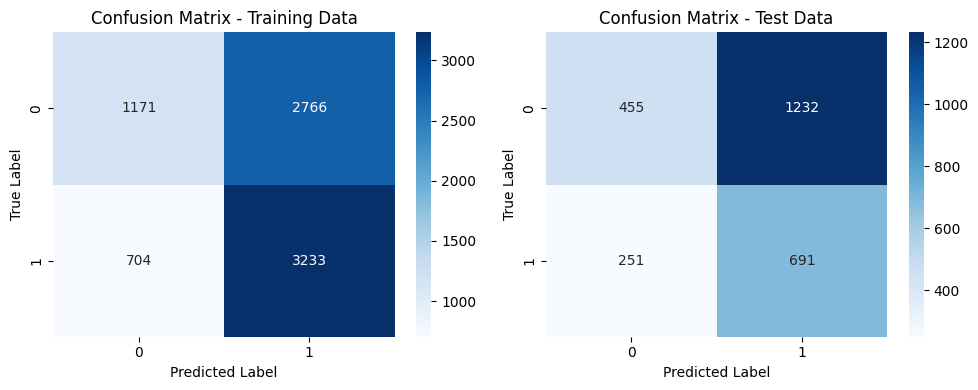

In [804]:

# Generate confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train_res, y_pred_train)

# Generate confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix for training data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot confusion matrix for test data
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.tight_layout()
plt.show()

**Explanation:** 

**Confusion Matrix - Training dan Test Data without Tuning**

**1. Training Data:**

- True Negatives (TN): 1171 observasi berhasil diprediksi sebagai tidak berisiko serangan jantung.
- False Positives (FP): 2766 observasi salah diprediksi sebagai berisiko serangan jantung.
- False Negatives (FN): 704 observasi salah diprediksi sebagai tidak berisiko serangan jantung.
- True Positives (TP): 3233 observasi berhasil diprediksi sebagai berisiko serangan jantung.

**2. Testing Data:**

- True Negatives (TN): 455 observasi berhasil diprediksi sebagai tidak berisiko serangan jantung.
- False Positives (FP): 1232 observasi salah diprediksi sebagai berisiko serangan jantung.
- False Negatives (FN): 251 observasi salah diprediksi sebagai tidak berisiko serangan jantung.
- True Positives (TP): 691 observasi berhasil diprediksi sebagai berisiko serangan jantung.

**Insight**

Model menunjukkan kemampuan yang kuat dalam mengurangi false negatives (FN), terutama pada data train dengan hanya 704 kasus yang tidak terdeteksi sebagai berisiko serangan jantung dan 251 kasus pada data test. Ini penting dalam kondisi seperti prediksi risiko serangan jantung di mana identifikasi kasus yang sebenarnya berisiko sangat penting untuk mencegah diagnosa yang terlewat.

Namun, jumlah false positives (FP) cukup tinggi, terutama pada data uji dengan 1232 kasus. Hal ini menunjukkan bahwa meskipun model baik dalam menangkap sebagian besar kasus berisiko tinggi (recall tinggi), model ini cenderung memberikan banyak prediksi false positives, yang mengarah pada banyaknya kasus yang sebenarnya tidak berisiko diprediksi sebagai berisiko.


In [805]:
# Create function to create reports
def performance_report(all_reports, y_train_res, y_pred_train, y_test, y_pred_test, name):
    # Calculate recall scores
    score_reports = {
        'Recall Train Set': recall_score(y_train_res, y_pred_train),
        'Recall Test Set': recall_score(y_test, y_pred_test),
    }


    # Calculate confusion matrices for train and test sets
    cm_train = confusion_matrix(y_train_res, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Extract false negatives from the confusion matrices and add to the report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]
    
    # Store the report in the dictionary with the specified model name
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train_res, y_pred_train, y_test, y_pred_test, 'Decision Tree without Tuning')

pd.DataFrame(all_reports)

,Decision Tree without Tuning
Recall Train Set,0.821184
Recall Test Set,0.733546
False Negative Train,704.000000
False Negative Test,251.000000


Tabel tersebut menyajikan performance model Decision Tree tanpa tuning, yang menunjukkan Recall rates yang cukup tinggi dan False Negative yang minimal dalam training dna testing.

#### **ii. Best Model with Hyperparameter Tuning**

Meskipun model ini berkinerja baik, masih ada ruang untuk perbaikan. Oleh karena itu, **hyperparameter tuning** digunakan di sini untuk lebih mengoptimalkan model Decision Tree dan mencapai hasil yang lebih baik lagi. Hyperparameter tuning pada dataset ini dilakukan dengan **GridSearchCV**.

Ada beberapa parameter yang dieksplorasi dalam tuning ini, yaitu:
- splitter
- max_depth
- min_samples_split
- min_samples_leaf
- class_weight

In [806]:
# Perform hyperparameter tuning for the best model
if best_model_name == 'Decision Tree':
    param_grid_dt = {
        'classifier__splitter': ['best', 'random'],
        'classifier__max_depth': [1, 2, 3, 4],
        'classifier__min_samples_split': [2, 3, 5, 7, 9],
        'classifier__min_samples_leaf': [3, 5, 7, 9, 11],
        'classifier__class_weight': [None, 'balanced']
    }

# Set up the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(pipe_dt, 
                              param_grid=param_grid_dt, 
                              scoring='recall', 
                              cv=kf, 
                              verbose=2, 
                              n_jobs=-1)

# Fit GridSearchCV for Decision Tree
grid_search_dt.fit(X_train_res, y_train_res)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_normal',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Cholesterol',
                                                                          'Heart_Rate',
                                                                          'Stress_Level',
                                                                          'BMI',
                                                                          'Triglycerides'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__max_depth': [1, 2, 3, 4],
                         'classifier__min_samples_leaf': [3, 5, 7, 9, 11],
                         'classifier__min_samples_split': [2, 3, 5, 7, 9],
                         'classifier__splitter': ['best', 'random']},
             scoring='recall', verbose=2)

In [807]:
# Best hyperparameters for Decision Tree
print('Best hyperparameters for Decision Tree:', grid_search_dt.best_params_)

# Best recall for Decision Tree
print('Best recall for Decision Tree:', grid_search_dt.best_score_)

Best hyperparameters for Decision Tree: {'classifier__class_weight': None, 'classifier__max_depth': 1, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__splitter': 'best'}
Best recall for Decision Tree: 0.9004269893381667


Hyperparameter terbaik untuk model Decision Tree diidentifikasi sebagai berikut:

- **splitter** : best
- **max_depth** : 1
- **min_samples_split** : 2
- **min_samples_leaf** : 3
- **class_weight** : None

Hal ini menghasilkan skor recall terbaik sebesar 0.9004, yang meng-highlight efektivitas model yang dituning dalam menangkap kasus risiko serangan jantung secara akurat.

In [808]:
# Save best Decision Tree model to a variable
best_dt_model = grid_search_dt.best_estimator_

# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_dt_model.predict(X_train_res)
y_pred_test_tuned = best_dt_model.predict(X_test)

# Print Classification Report
print(classification_report(y_train_res, y_pred_train_tuned))
print(classification_report(y_test, y_pred_test_tuned))

# Print recall score
print('Recall Score - Train Set  : ', recall_score(y_train_res, y_pred_train_tuned))
print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_tuned))

              precision    recall  f1-score   support

           0       0.59      0.20      0.30      3937
           1       0.52      0.86      0.65      3937

    accuracy                           0.53      7874
   macro avg       0.56      0.53      0.47      7874
weighted avg       0.56      0.53      0.47      7874

              precision    recall  f1-score   support

           0       0.65      0.20      0.30      1687
           1       0.36      0.81      0.50       942

    accuracy                           0.42      2629
   macro avg       0.51      0.50      0.40      2629
weighted avg       0.55      0.42      0.37      2629

Recall Score - Train Set  :  0.8623317246634493
Recall Score - Test Set   :  0.8121019108280255


Setelah hyperparameter tuning, nilai recall pada train set meningkat menjadi 0.8623, menunjukkan bahwa model kini lebih baik dalam mengidentifikasi kasus serangan jantung pada train set. Demikian pula, pada test set, nilai recall tetap tinggi pada 0.8121, menunjukkan kemampuan model untuk menggeneralisasi dengan baik terhadap data yang tidak terlihat sambil mempertahankan kinerja yang kuat dalam mengidentifikasi kasus serangan jantung. Model menandakan adanya pengurangan overfitting setelah tuning.

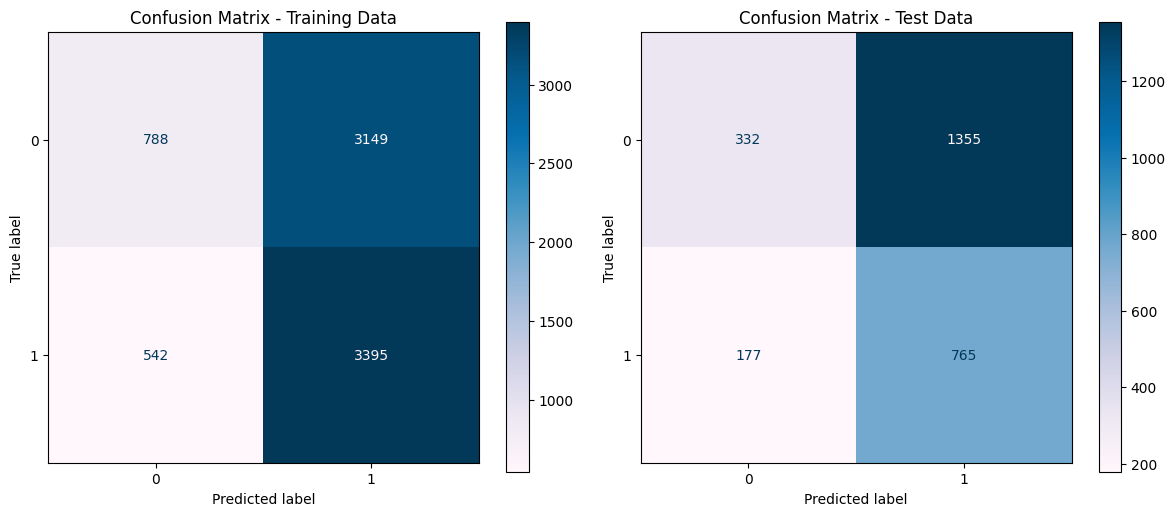

In [809]:
# Plot confusion matrix for training and testing data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for training data
train_matrix = ConfusionMatrixDisplay.from_estimator(best_dt_model, X_train_res, y_train_res, cmap='PuBu', ax=axes[0])
train_matrix.ax_.set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
test_matrix = ConfusionMatrixDisplay.from_estimator(best_dt_model, X_test, y_test, cmap='PuBu', ax=axes[1])
test_matrix.ax_.set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()

**Explanation:** 

**Confusion Matrix - Training dan Test Data with Tuning**

**1. Training Data:**

- True Negatives (TN): 788 observasi berhasil diprediksi sebagai tidak berisiko serangan jantung.
- False Positives (FP): 3149 observasi salah diprediksi sebagai berisiko serangan jantung.
- False Negatives (FN): 542 observasi salah diprediksi sebagai tidak berisiko serangan jantung.
- True Positives (TP): 3395 observasi berhasil diprediksi sebagai berisiko serangan jantung.

**2. Testing Data:**

- True Negatives (TN): 332 observasi berhasil diprediksi sebagai tidak berisiko serangan jantung.
- False Positives (FP): 1355 observasi salah diprediksi sebagai berisiko serangan jantung.
- False Negatives (FN): 177 observasi salah diprediksi sebagai tidak berisiko serangan jantung.
- True Positives (TP): 765 observasi berhasil diprediksi sebagai berisiko serangan jantung.

**Insight**

Confusion Matrix memberikan detail yang berwawasan menunjukkan bahwa setelah dilakukan tuning, model memiliki kemampuan yang cukup baik dalam mengidentifikasi kasus berisiko pada data train. Namun, pada data test, terdapat peningkatan jumlah False Positives yang menunjukkan bahwa model cenderung memberikan prediksi "berisiko" pada kasus yang sebenarnya "tidak berisiko".

In [810]:
# Add results to the report
all_reports = performance_report(all_reports, y_train_res, y_pred_train_tuned, y_test, y_pred_test_tuned, 'Decision Tree with Tuning')
pd.DataFrame(all_reports)


,Decision Tree without Tuning,Decision Tree with Tuning
Recall Train Set,0.821184,0.862332
Recall Test Set,0.733546,0.812102
False Negative Train,704.000000,542.000000
False Negative Test,251.000000,177.000000


**Explanation:** 

Setelah tuning, model Decision Tree menunjukkan peningkatan performa yang signifikan dalam hal recall dan pengurangan false negatives baik pada data train maupun data test. Peningkatan ini menunjukkan bahwa tuning berhasil membuat model lebih efektif dalam mendeteksi kasus yang benar-benar berisiko serangan jantung, sehingga lebih bermanfaat dalam aplikasi klinis untuk mengidentifikasi pasien yang membutuhkan perhatian medis lebih lanjut.

## **9. Model Saving**


Dengan melihat hasil Model Evaluation dan Model Optimization, model Decision Tree dengan tuning parameter merupakan model terbaik yang akan disimpan. Model ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment. 

Best model terpilih akan disimpan ke dalam file '.pkl' terutama yang menggunakan pipeline. 

In [811]:
# Saving num_columns, cat_columns, dan best model terpilih

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_cols, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_cols, file_2)

# Save the best model
with open('best_dt_model.pkl', 'wb') as model_file:
  pickle.dump(best_dt_model, model_file)

In [812]:
# Memuat kembali model terbaik untuk verifikasi aja
with open('best_dt_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
print("Model terbaik yang dimuat kembali:", loaded_model)

Model terbaik yang dimuat kembali: Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_normal',
                                                  StandardScaler(),
                                                  ['Age', 'Cholesterol',
                                                   'Heart_Rate', 'Stress_Level',
                                                   'BMI', 'Triglycerides'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=1, min_samples_leaf=3,
                                        random_state=42))])


## **10. Model Inference**


Akan dilakukan pada file terpisah dengan nama **'P1M2_Iznia_Azyati_Inf.ipynb'**.


## **11. Conceptual Problems**


**1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!**

**Jawab:**

**Bagging (Bootstrap Aggregating)** adalah salah satu teknik dalam ensemble learning yang dikembangkan untuk meningkatkan stabilitas dan akurasi algoritma machine learning. Latar belakang utama adanya bagging adalah untuk mengatasi masalah overfitting dan meningkatkan generalisasi model.

- **Overfitting:** Overfitting terjadi ketika model machine learning terlalu rumit dan menyesuaikan diri dengan noise atau data yang spesifik dari dataset pelatihan. Hal ini menyebabkan performa yang buruk pada data baru (data testing). Bagging membantu mengurangi overfitting dengan menggabungkan beberapa model yang dilatih pada subset data yang berbeda.

- **Variance Reduction:** Algoritma machine learning tunggal sering kali memiliki variabilitas tinggi terhadap perubahan dalam data pelatihan. Dengan menggunakan bagging, varians model dapat dikurangi karena gabungan beberapa model biasanya lebih stabil dibandingkan dengan model individu.

- **Robustness Improvement:** Dengan menggabungkan beberapa model, bagging meningkatkan robustitas prediksi. Ini membantu dalam situasi di mana model tunggal mungkin memberikan prediksi yang kurang konsisten.

**Cara Kerja Bagging**

Bagging bekerja dengan cara membangun beberapa model prediktif dari subset data yang berbeda dan menggabungkan prediksi mereka untuk mendapatkan hasil akhir. Berikut adalah langkah-langkah dasar dalam bagging:
1. **Bootstrap Sampling:** Dari dataset pelatihan asli, beberapa subset data diambil dengan penggantian (replacement). Setiap subset data memiliki ukuran yang sama dengan dataset asli tetapi mungkin memiliki beberapa duplikasi data karena sampel diambil dengan penggantian. Proses ini dikenal sebagai bootstrap sampling.
2. **Model Training:** Setiap subset data digunakan untuk melatih model prediktif yang terpisah. Model yang digunakan bisa berupa pohon keputusan, regresi, atau algoritma lain yang sesuai.
3. **Aggregation:** Setelah semua model dilatih, mereka digunakan untuk membuat prediksi pada data baru. Prediksi dari masing-masing model kemudian digabungkan. Untuk masalah regresi, prediksi akhir adalah rata-rata dari semua prediksi model. Untuk masalah klasifikasi, prediksi akhir biasanya didasarkan pada voting mayoritas dari semua prediksi model.

**Ilustrasi Bagging**

Misalkan kita memiliki dataset dengan 100 data. Dalam proses bagging, kita mungkin mengambil 10 subset data yang berbeda, masing-masing dengan 100 data yang diambil secara acak dengan penggantian dari dataset asli. Sepuluh model kemudian dilatih pada setiap subset data tersebut. Ketika model digunakan untuk memprediksi data baru, prediksi dari sepuluh model tersebut digabungkan untuk menghasilkan prediksi akhir yang lebih stabil dan akurat. Dengan demikian, bagging membantu meningkatkan performa model machine learning dengan mengurangi overfitting dan varians, serta meningkatkan robustitas prediksi.

[Reference](https://link.springer.com/article/10.1007/BF00058655)

**2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih!**

**Jawab:**


**Algoritma Random Forest** adalah algoritma ensemble yang menggunakan teknik bagging untuk meningkatkan akurasi prediksi. Algoritma Random Forest adalah metode ensemble yang menciptakan banyak pohon keputusan selama fase pelatihan dan menghasilkan rata-rata prediksi mereka untuk tugas regresi atau menggunakan pemungutan suara mayoritas untuk tugas klasifikasi. Keuntungan utama Random Forest adalah kemampuannya untuk mengurangi overfitting dan meningkatkan akurasi prediksi dengan menggabungkan hasil dari beberapa pohon keputusan yang berbeda.
Berikut adalah cara kerjanya:

1. Bootstrap Sampling: Data pelatihan dibagi menjadi beberapa subset melalui teknik bootstrap, yang berarti sampel diambil dengan penggantian dari dataset asli. Setiap pohon keputusan dalam hutan dilatih pada subset data yang berbeda ini.
2. Training Multiple Trees: Setiap pohon keputusan dilatih secara independen pada subset data yang berbeda. Karena pohon keputusan cenderung memiliki varian tinggi, pelatihan pada subset yang berbeda membantu mengurangi varian model secara keseluruhan.
3. Voting Mechanism: Setelah semua pohon dilatih, Random Forest membuat prediksi dengan menggabungkan hasil dari semua pohon. Untuk klasifikasi, setiap pohon memberikan satu suara dan kelas dengan suara terbanyak dipilih sebagai prediksi akhir. Untuk regresi, rata-rata dari semua prediksi pohon digunakan.


**XGBoost (Extreme Gradient Boosting)** adalah algoritma yang cepat dan fleksibel yang membangun pohon secara berurutan, memperbaiki kesalahan dari yang sebelumnya untuk meningkatkan prediksi. Model ini menggunakan algoritma penurunan gradien untuk meminimalkan kerugian saat menambahkan model baru. Algoritma ini mencakup optimasi seperti regularization, handling missing values, dan tree trimming. Algoritma ini biasanya direkomendasikan untuk data yang imbalanced.

[Reference](https://dl.acm.org/doi/10.1145/2939672.2939785)

<center>

**Comparison Random Forest and XGBoost**

| Aspek                    | Random Forest                                                             | XGBoost                                                                   |
|----------------------------|---------------------------------------------------------------------------|---------------------------------------------------------------------------|
|Teknik |	Bagging |	Boosting|
|Pembelajaran |	Paralel, pohon keputusan dilatih secara independen	|Berurutan, model dilatih secara sekuensial untuk memperbaiki kesalahan dari model sebelumnya |
|Data Sampling	 |Bootstrap sampling dengan penggantian untuk membuat subset data pelatihan yang berbeda |	Data diberi bobot dan diubah pada setiap iterasi untuk fokus pada kesalahan|
| Kombinasi Model|	Voting untuk klasifikasi; rata-rata untuk regresi|	Model digabungkan dengan bobot yang berbeda berdasarkan kinerjanya |
|Tujuan|	Mengurangi varian dan overfitting dengan menggabungkan hasil dari beberapa pohon keputusan |	Meningkatkan akurasi dengan memperbaiki kesalahan dari model sebelumnya |
|Kompleksitas Model |	Cenderung lebih sederhana, lebih cepat dalam pelatihan dan inferensi |	Cenderung lebih kompleks, membutuhkan lebih banyak waktu untuk pelatihan tetapi lebih akurat |
|Penggunaan Regularisasi |	Tidak ada regularisasi eksplisit |	Menggunakan teknik regularisasi (L1 dan L2) untuk menghindari overfitting |
|Kinerja pada Data Imbang	 | Baik untuk data yang seimbang |	Efektif untuk menangani data yang tidak seimbang |
|Overfitting |	Cenderung kurang overfitting karena menggunakan banyak pohon keputusan	| Dapat mengurangi overfitting melalui regularisasi dan penyesuaian bobot |
|Interpretabilitas |	Lebih mudah diinterpretasi karena menggunakan banyak pohon sederhana |	Lebih sulit diinterpretasi karena kompleksitas model yang lebih tinggi|




**3. Jelaskan apa yang dimaksud dengan Cross Validation!**

**Jawab:**

**Cross Validation** adalah teknik yang digunakan dalam machine learning untuk mengevaluasi kinerja model dan memastikan bahwa model tersebut memiliki kemampuan generalisasi yang baik terhadap data baru yang belum pernah dilihat sebelumnya. Teknik ini membagi dataset menjadi beberapa subset, atau lipatan (folds), dan menggunakan subset tersebut untuk melatih dan menguji model secara bergantian.

**Jenis-jenis cross-validation:**

1. Teknik umum untuk cross-validation adalah metode **K-Folds**. Metode ini membagi dataset menjadi K kelompok, menggunakan satu kelompok untuk pengujian dan sisanya untuk pelatihan secara iteratif. Pendekatan ini memastikan bahwa semua titik data berkontribusi pada pelatihan dan pengujian, meminimalkan bias. Nilai K, biasanya antara 5 dan 10, menentukan jumlah pembagian. Selama proses ini, model dilatih pada K-1 fold dan divalidasi pada fold yang tersisa, diulang hingga setiap fold bertindak sebagai set pengujian. Kinerja rata-rata di seluruh iterasi ini mengukur efektivitas model.

2. Untuk model klasifikasi, teknik **StratifiedKfold** mempertahankan distribusi kelas yang seimbang di setiap fold, meningkatkan keandalan model. Secara keseluruhan, cross-validation membantu dalam mengevaluasi kinerja model, mengurangi bias, dan meningkatkan keandalan.

**Keuntungan Cross Validation:**

- *Mengurangi Overfitting:* Dengan menggunakan berbagai subset data untuk pelatihan dan pengujian, cross validation membantu memastikan bahwa model tidak hanya menghafal data pelatihan tetapi juga dapat menggeneralisasi dengan baik pada data baru.

- *Estimasi Kinerja yang Lebih Akurat:* Cross validation memberikan gambaran yang lebih realistis tentang bagaimana model akan berkinerja pada data baru.

- *Efisien dalam Menggunakan Data:* Semua data digunakan baik untuk pelatihan maupun pengujian, tidak ada data yang terbuang.




## **12. Kesimpulan**


#### **a. EDA**

- **Ikhtisar Demografis**

    Dataset ini sebagian besar terdiri dari individu dengan risiko serangan jantung rendah, termasuk individu tanpa riwayat penyakit jantung atau diabetes, sebagian besar berada di kelompok usia 50-60 tahun, dengan lebih banyak pria dibandingkan wanita. Mayoritas individu tidak merokok dan memiliki kadar kolesterol serta trigliserida yang bervariasi.

- **Insiden Serangan Jantung Berdasarkan Faktor Demografis**
    
    Insiden serangan jantung bervariasi di berbagai faktor demografis, dengan penyakit jantung dan diabetes secara signifikan meningkatkan risiko, serta individu dengan kebiasaan merokok menunjukkan jumlah kasus serangan jantung yang lebih tinggi. Selain itu, individu yang lebih tua dan dengan tingkat stres tinggi juga menunjukkan risiko serangan jantung yang lebih besar.

- **Analisis Distribusi**

    Dataset ini memiliki rentang usia yang luas, dengan puncak di usia akhir 50-an. Kadar kolesterol rata-rata sebagian besar berada dalam rentang sehat tetapi ada beberapa yang menunjukkan potensi risiko. Distribusi BMI cenderung ke arah overweight dan obesitas, yang menyoroti sebagian besar populasi dalam kategori ini.

- **Analisis Korelasi**

    Data menunjukkan bahwa ada peningkatan kadar kolesterol dan trigliserida dengan bertambahnya usia, serta adanya hubungan potensial antara obesitas dan tingkat kolesterol yang lebih tinggi. Selain itu, kadar stres juga menunjukkan korelasi dengan peningkatan risiko serangan jantung.

- **Persentase Serangan Jantung**
    
    Serangan jantung relatif jarang dalam dataset ini, dengan hanya 35.8% individu yang mengalami serangan jantung, sementara 64.2% individu tidak mengalami serangan jantung. Hal ini menunjukkan ketidakseimbangan dalam data yang memerlukan penanganan untuk memastikan model dapat memprediksi serangan jantung dengan akurat.

#### **b. Model Evaluation**

- **Best Model**: Decision Tree muncul sebagai model dengan performa terbaik dengan skor validasi recall rata-rata sebesar **0.7538**, menunjukkan keunggulannya dibandingkan dengan model lain berdasarkan metrik evaluasi yang dipilih.

- **Metris Evaluation Training Set:**
  - **Recall without Tuning**: Mencapai 0.8212, capturing 82.12% dari kasus positif.
  - **Recall with Tuning**: Meningkat menjadi 0.8623, capturing 86.23% dari kasus positif.
  - **False Negatives without Tuning**: 704 kasus positif salah diklasifikasikan sebagai negatif.
  - **False Negatives with Tuning**: 542 kasus positif salah diklasifikasikan sebagai negatif.

- **Metris Evaluation Testing Set:**
  - **Recall without Tuning**: Mencapai 0.7335, capturing sekitar 73.35% dari kasus positif.
  - **Recall with Tuning**: Meningkat menjadi 0.8121, capturing sekitar 81.21% dari kasus positif.
  - **False Negatives without Tuning**: 251 kasus positif salah diklasifikasikan sebagai negatif.
  - **False Negatives with Tuning**: 177 kasus positif salah diklasifikasikan sebagai negatif.

Oleh karena itu, model menunjukkan peningkatan signifikan dalam recall setelah tuning, mengurangi jumlah false negatives sebesar 74 kasus.

- **Model Fit**: Model menunjukkan sedikit **kecenderungan overfitting**, terutama pada model tanpa tuning. Hal ini terlihat dari perbedaan yang cukup signifikan antara nilai recall pada data train dan data test sebelum tuning. Setelah tuning, nilai recall pada data train dan data test lebih seimbang, tetapi tetap menunjukkan kecenderungan overfitting yang perlu diperhatikan lebih lanjut.

- **Prediction Capability**: Meskipun masih terdapat kesalahan prediksi, model ini tetap dapat digunakan secara efektif untuk memprediksi risiko serangan jantung. Model berhasil meningkatkan nilai recall setelah tuning, menunjukkan peningkatan kemampuan dalam mendeteksi kasus positif, meskipun masih perlu diwaspadai kecenderungan overfitting.

- **Confusion Matrix**: Hasil confusion matrix menunjukkan bahwa setelah tuning, model secara signifikan meningkatkan kemampuan dalam mengurangi False Negatives. Dengan mengurangi False Negatives, model memastikan lebih sedikit kasus serangan jantung yang tidak terdeteksi.

#### **c. Model Improvement**

- **Penerapan Data Balancing Lanjutan**: Eksperimen dengan metode lain seperti SMOTE-Tomek Links untuk penyeimbangan data yang lebih efektif dan mengurangi kemungkinan overfitting.

- **Hyperparameter Optimization**: Lakukan tuning hyperparameter secara ekstensif untuk mengoptimalkan model lebih lanjut.

- **Ensemble Techniques**: Memtimbangkan penggunaan metode ensamble seperti stacking atau boosting untuk meningkatkan kekuatan prediksi dan ketahanan model. Contohnya dengan mengombinasikan Decision Tree dengan XGBoost untuk meningkatkan kelebihan dari kedua algoritma tersebut.

- **Feature Engineering**: Implementasikan teknik engineering fitur untuk mengekstrak informasi yang lebih bermakna dari data.

- **Evaluation Metrics Expansion**: Mengeksplorasi metrik evaluasi tambahan seperti AUC-ROC untuk mendapatkan penilaian kinerja model yang lebih komprehensif. Ini akan membantu dalam menilai keseimbangan antara sensitivitas dan spesifisitas model.


#### **d. Bussiness Insights**

- **Health Profile Implications:** Beragamnya rentang usia, kadar glukosa, dan distribusi BMI dalam dataset menunjukkan tantangan kesehatan potensial, termasuk masalah terkait obesitas dan diabetes. Penyedia layanan kesehatan dapat menggunakan informasi ini untuk merancang program perawatan preventif dan rencana perawatan yang dipersonalisasi yang lebih efektif dalam mengatasi masalah kesehatan tersebut.

- **Demographic Insights**: Rumah sakit atau healthcare dapat menyesuaikan produk dan layanan untuk memenuhi persyaratan kesehatan dan gaya hidup spesifik dari demografi tersebut.

- **Correlation Insights for Health Management:** Mengenali korelasi antara usia, BMI, dan kadar glukosa memberi wawasan tentang strategi manajemen kesehatan yang efektif. Fokus pada kontrol berat badan, pemantauan glukosa, dan intervensi gaya hidup dapat membantu mengurangi risiko terkait kesehatan, terutama bagi mereka yang berada dalam kategori usia dan BMI yang lebih tinggi.

- **Health Profile Implications** : Beragamnya rentang usia, kadar glukosa, dan distribusi BMI pada kumpulan data menunjukkan potensi tantangan kesehatan, termasuk masalah terkait diabetes dan obesitas. Rumah sakit dapat menggunakan informasi ini untuk merancang program perawatan pencegahan dan rencana perawatan yang dipersonalisasi.

### **Final Conclusion**

**Model Decision Tree** menunjukkan performa yang memuaskan dalam memprediksi risiko serangan jantung, dengan skor recall testing sebesar 0.8121 yang menyoroti kemampuannya untuk melakukan generalisasi terhadap data baru. Sementara performanya cukup menjanjikan, masih bisa melakukan improvement lebih lanjut guna meningkatkan akurasi dan meminimalkan kesalahan False Negatives. Dengan demikian, model ini bisa menjadi alat yang berguna dalam membantu identifikasi awal risiko serangan jantung, meskipun langkah-langkah optimasi lebih lanjut diperlukan untuk memaksimalkan efektivitasnya.